# Final Project Submission

* Student name: `Reno Vieira Neto`
* Student pace: `self paced`
* Scheduled project review date/time: 
* Instructor name: `Jeff Herman`
* Blog post URL: https://renoneto.github.io/predicting_rare_events

# Table of Contents <a class="anchor" id="toc"></a>
**[Business Case and Goals](#bc)**

**[The Dataset](#td)**

**[Dataset Exploration and Cleaning](#dec)**
* [Cleaning/Uniqueness](#cu)
* [No. of Customers by `column`](#exp1)
* [Distribution of certain features by Churn Status](#exp2)
* [Filled Distribution of features by Churn Status](#exp3)
* [Correlation Matrix](#exp4)
* [No. of Customers by State by Churn Status](#exp5)
* [Churn Rate by State](#exp6)
* [Churn Rate and Absolute Values of Churned Records by State](#exp7)
* [Distribution of Total Minutes, Calls and Charges by Churn Status](#exp8)
* [Analyze Outliers](#exp9)

**[Modeling](#model)**
* [One-hot Encoding](#model1)
* [Define `X` and `y` + Train/Test Split](#model2)
* [Feature Scaling](#model3)
* **[K-Nearest Neighbors Classifier](#model4)**
    * [Find the best No. of Neighbors](#model5)
    * [Iterate through different dataset transformations](#model6)
    * [Baseline Model](#model7)
    * [Scaled Features](#model8)
    * [Normalized Features](#model9)
    * [Address Class Imbalance Problem](#model10)
    * [Resampled of Scaled (Non-Normalized)](#model11)
    * [Compare Models](#model12)
    * [Conclusions](#model13)
    * [True vs False Positives Trade-off](#model14)
    * [Compare KNeighborsClassifier for `N-Neighbors = 5`](#model15)
    * [Analyze Results](#model16)
* **[Logistic Regression](#model17)**
    * [Analyze Results](#model18)
* **[Decision Tree](#model19)**
    * [Analyze Results](#model20)
* **[Random Forest](#model21)**
    * [Analyze Results](#model22)
* **[XGBoost](#model23)**
    * [Analyze Results](#model24)
* **[Comparing Models](#model25)**
* **[Choosing a Model](#model26)**
* **[Model Tuning](#model27)**
* **[Model Interpretation](#model28)**
    * [Understand the importance of features to the model](#model29)
    * [Understanding the Decision Tree Model](#model30)

**[Important Caveat](#caveat)**

# Business Case and Goal <a class="anchor" id="bc"></a>
I was hired by SyriaTel a Telecom Company to build a classifier to predict whether a customer will ("soon") stop doing business with them ( _note this is a binary classification problem_ ).

Therefore, their goal is to understand why these customers are not sticking very long and help them identify those customers before they churn so they can take action and avoid that from happening.

# The Dataset <a class="anchor" id="td"></a>
I'm using the **Churn in Telecoms dataset** from Kaggle. 

Here's the description of the dataset:
>This public dataset is provided by the CrowdAnalytix community as part of their churn prediction competition. The real name of the telecom company is anonymized. It contains 20 predictor variables mostly about customer usage patterns. There are 3333 records in this dataset, out of which 483 customers are churners and the remaining 2850 are non-churners. Thus, the ratio of churners in this dataset is 14%

[You can find more about it here](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset)

# Dataset Exploration and Cleaning <a class="anchor" id="dec"></a>
## Import necessary packages 

In [1]:
import warnings

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from dtreeviz.trees import dtreeviz
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Set Random Seed
np.random.seed(123)

# Remove warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Cleaning/Uniqueness <a class="anchor" id="cu"></a>

In [2]:
# Import file
df = pd.read_csv('data.csv')

# Show first rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
# DataFrame Shape
df.shape

(3333, 21)

Check Data Types and Nulls

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

No nulls but I need to convert `area code` to string and binary columns to binary values.

In [5]:
# Convert Area Code to String
df['area code'] = df['area code'].astype(str)

Convert binary columns to 1/0

In [6]:
# Voice Mail Plan
df.loc[df['voice mail plan'] == 'yes', 'voice mail plan'] = 1
df.loc[df['voice mail plan'] == 'no', 'voice mail plan'] = 0
df['voice mail plan'] = df['voice mail plan'].astype(int)

# International Plan
df.loc[df['international plan'] == 'yes', 'international plan'] = 1
df.loc[df['international plan'] == 'no', 'international plan'] = 0
df['international plan'] = df['international plan'].astype(int)

# Churn
df.loc[df['churn'] == True, 'churn'] = 1
df.loc[df['churn'] == False, 'churn'] = 0
df['churn'] = df['churn'].astype(int)

Next, get some basic stats on the columns.

In [7]:
df.describe()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


Nothing major stands out at this point.

#### Analyze all unique values to see if I can find something weird
Next, I'm going to print all the unique values for columns. Since I'm dealing with a small dataset it's okay for me to manually review the values. By doing that I expect to find weird values and/or outliers.

In [8]:
for col in df.columns:
    print(col)
    print(np.sort(df[col].unique()))
    print('')

state
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY']

account length
[  1   2   3   4   5   6   7   8   9  10  11  12  13  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 

The data looks good so far. No weird values or anything. If there are any outliers I'll probably find them when plotting charts.

#### Change field names and replace space with underscore

In [9]:
# Rename columns, replace space with underscore
new_columns = [i.replace(' ', '_') for i in df.columns]
df.columns = new_columns

#### Check for uniqueness of `phone_number`
Phone Numbers should be unique on the dataset

In [10]:
sum(df.groupby('phone_number').count()['area_code'] > 1)

0

Everything looks good, the dataset contains one row per phone number

**[Go back to Table of Contents](#toc)**

## No. of Customers by `column` <a class="anchor" id="exp1"></a>
To help me understand a bit more what I'm analyzing, I'll plot different Bar Charts for some categorical features.

In [11]:
# Create a Function to facilitate this process
def bar_chart_count(df, column, count_column):
    """
    Plot bar chart of a given column with the frequency of each unique value.

    Args:
      df(pandas.DataFrame): DataFrame with the columns and data
      column(str): Column Name to plot
      count_column(str): Any other column just to count the No. of Customers
    """
    # Calculate No. of Customers by Column
    to_plot = df.groupby(column).count()[count_column].sort_values(ascending=False).reset_index()

    # Create Figure and Chart
    plt.figure(figsize=(20,7))
    plt.bar(to_plot[column], to_plot[count_column])
    
    # Add Title and Labels
    plt.title(f'No. of Customers by {column.replace("_", " ").title()}', size=15)
    plt.xlabel(column, size=14)
    plt.ylabel('No. of Customers', size=14)
    
    plt.show();

#### `state`

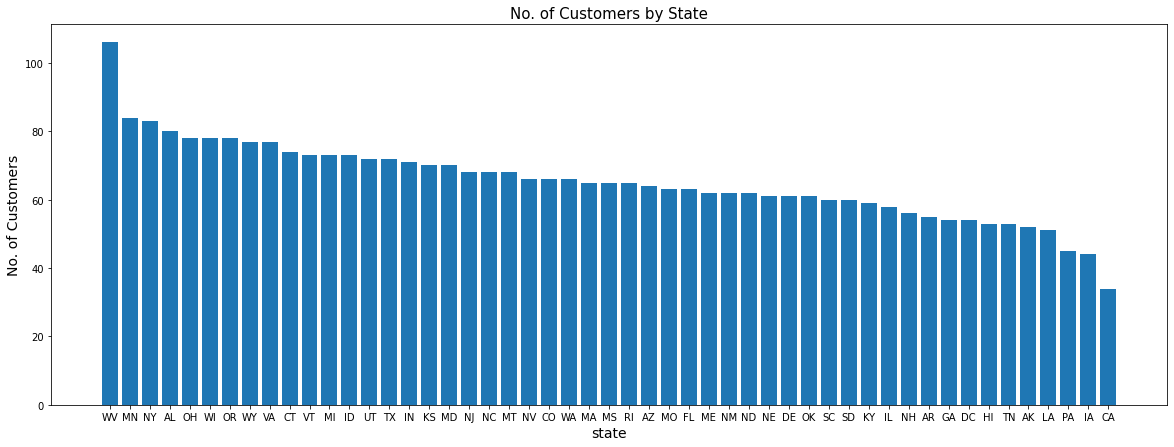

In [12]:
# No. of Customers by State 
bar_chart_count(df, 'state', 'area_code')

#### Conclusions:
- We have an unbalaced dataset from the standpoint of the `state`. I might have to perform some sort of oversampling to make sure that states with more clients will not completely skew the model.

#### `area_code`

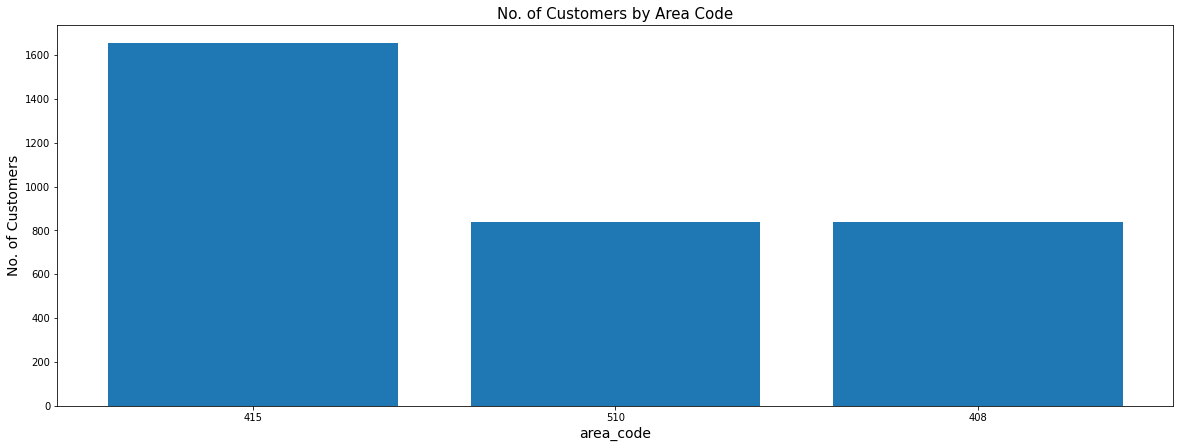

In [13]:
bar_chart_count(df, 'area_code', 'phone_number')

#### Conclusions:
- More records from `415` not sure if that means anything. Also, I'm surprised to see a lot of states but only three area codes.

#### `international_plan`

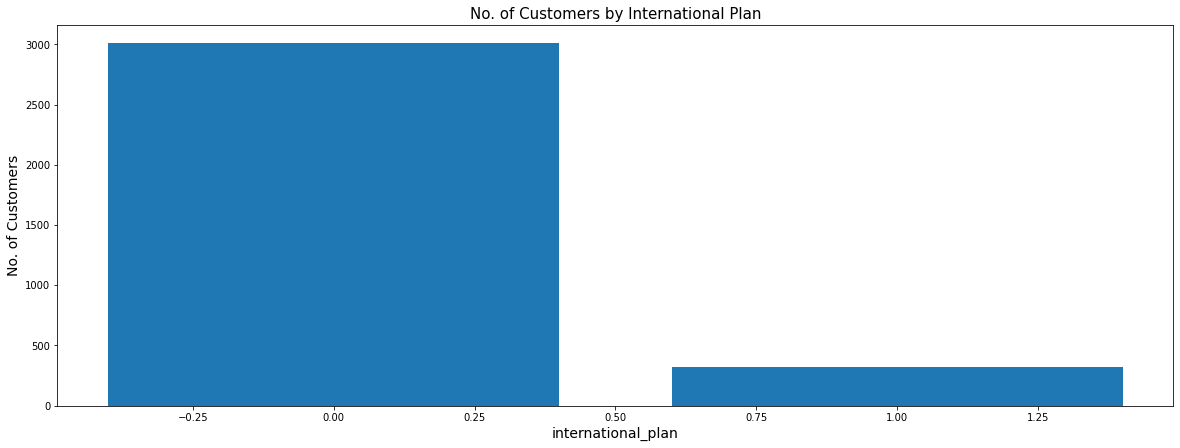

In [14]:
bar_chart_count(df, 'international_plan', 'phone_number')

#### Conclusions: 
- Most Phone Numbers don't have an international plan.

#### `voice_mail_plan`

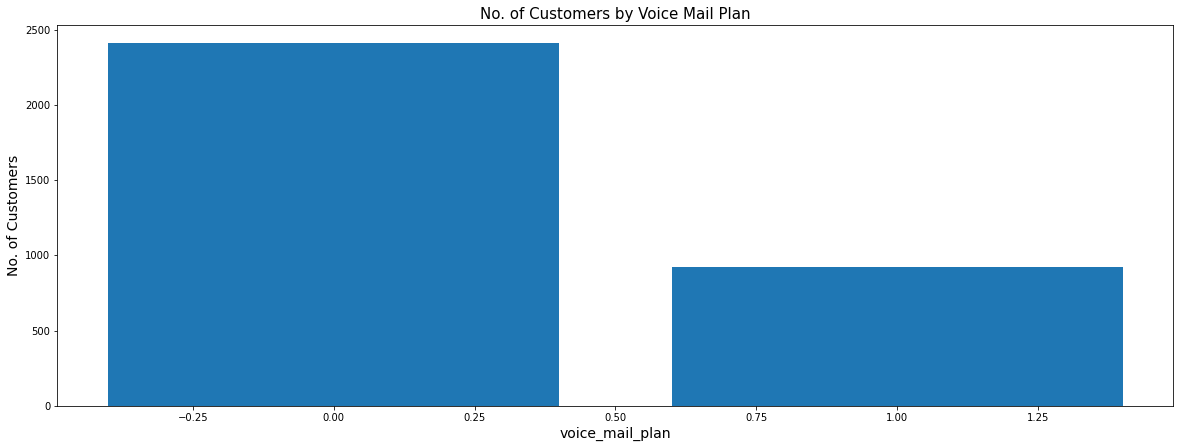

In [15]:
bar_chart_count(df, 'voice_mail_plan', 'phone_number')

#### Conclusions: 
- Most don't have a voice mail plan either.

#### `customer_service_calls`

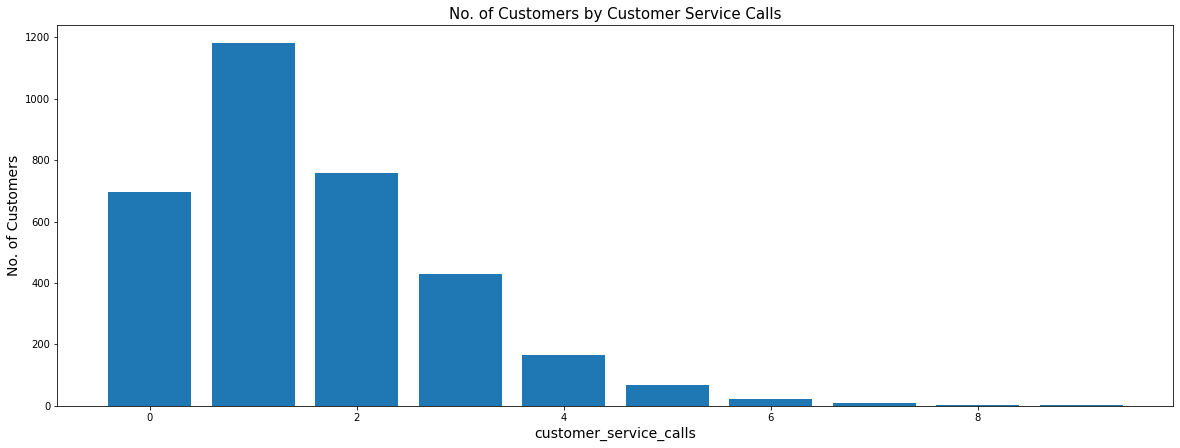

In [16]:
bar_chart_count(df, 'customer_service_calls', 'phone_number')

#### Conclusions:
- It's possible to see a positively skewed distribution for the No. of Customer Service Calls. Indicating that most clients don't reach out to Customer Service more than once or twice.

#### `churn`

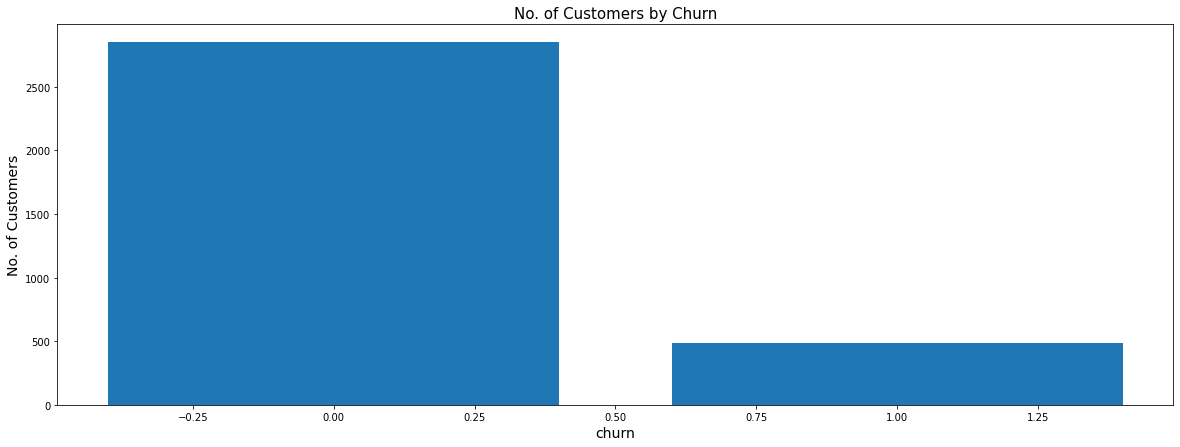

In [17]:
bar_chart_count(df, 'churn', 'phone_number')

#### Conclusions:
- Most of records are of non-churned clients. I'll need to fix that when training the model or the model will just predict everything as "not churned" and will have a high accuracy score.

**[Go back to Table of Contents](#toc)**

## Distribution of certain features by Churn Status <a class="anchor" id="exp2"></a>
This will help me understand:
- If I'm dealing with normally distributed features or not and how much work I'll have to possibly put on normalizing them. 
- If certain features do a great job at classifying Churned Customers based on threshold values. For example, "All Customers where Feature A > X Value are churned".

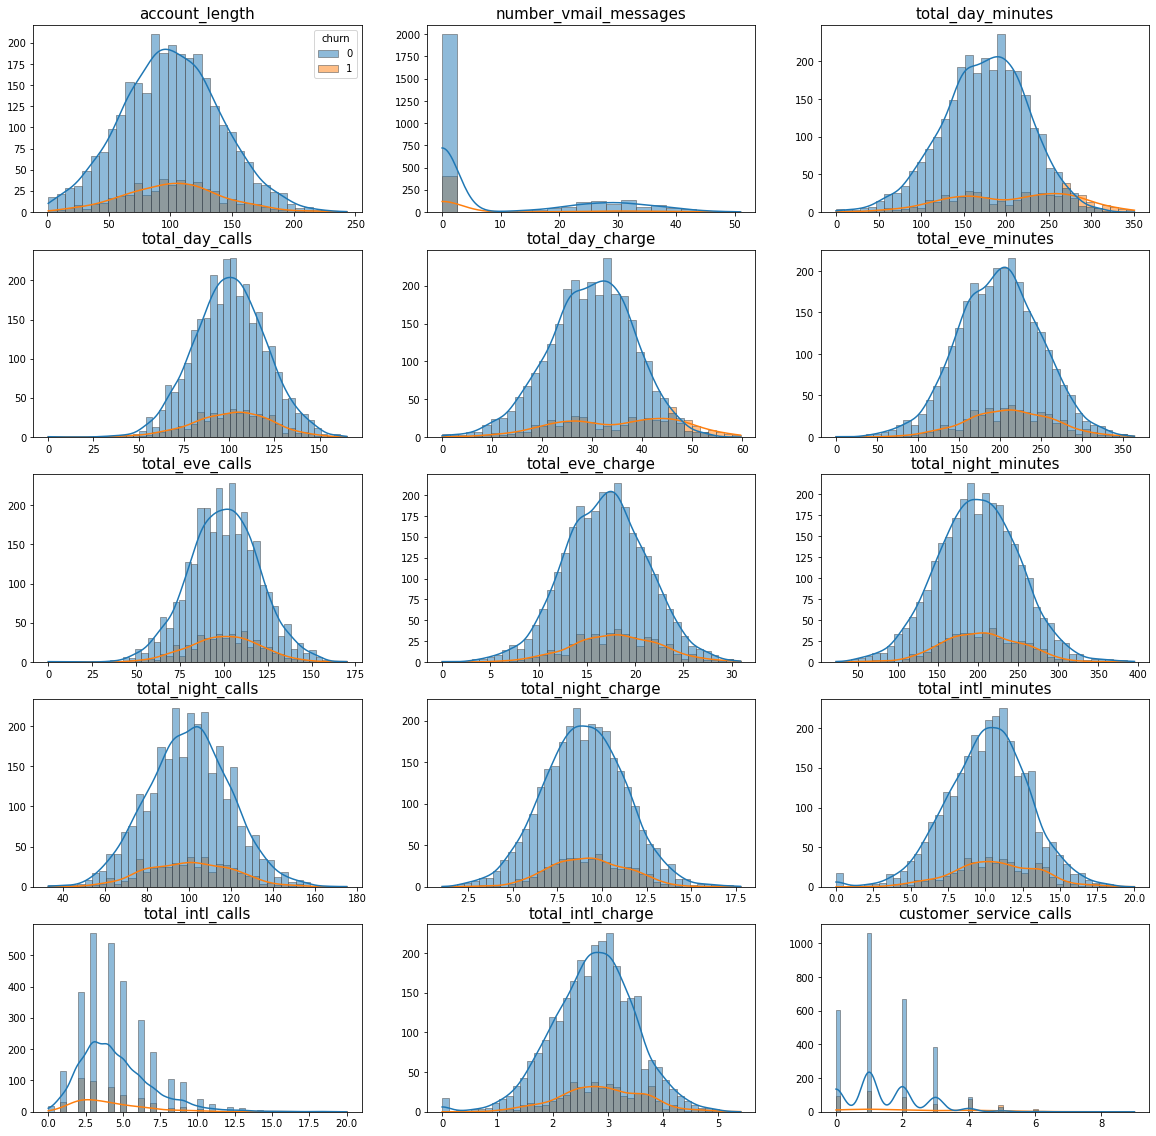

In [18]:
# Define columns to plot
columns_plot = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 
                'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 
                'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 
                'total_intl_calls', 'total_intl_charge', 'customer_service_calls']

# Create Figure and Axes
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20,20))

# Loop through columns
for idx, col in enumerate(columns_plot):
    
    # Calculate chart position
    col_n = idx % 3
    row_n = idx // 3
    
    # Plot Histogram, depending on the subplot I'm going to add a legend or not
    if col_n == 0 and row_n == 0:
        sns.histplot(data=df, x=col, hue="churn", multiple="layer", edgecolor=".3", 
                     linewidth=.5, ax=axes[row_n][col_n], kde=True)
    else:
        sns.histplot(data=df, x=col, hue="churn", multiple="layer", edgecolor=".3", 
                     linewidth=.5, ax=axes[row_n][col_n], kde=True, legend=None)
    
    # Set Labels and titles
    axes[row_n][col_n].set_ylabel(None)
    axes[row_n][col_n].set_xlabel(None)
    axes[row_n][col_n].set_title(col, size=15)

plt.show();

#### Conclusions:
- Most of the features are normally distributed but they are in different scales which can negatively impact the model depending on the algorithm.
- Churned clients seem to have a higher median for `total_day_minutes`.
- Most of the customers don't have Voice Mail messages.

**[Go back to Table of Contents](#toc)**

## Filled Distribution of features by Churn Status <a class="anchor" id="exp3"></a>
Since it's hard to see any thresholds because there are more non-churned clients, I'm going use a filled distribution chart. With that, I can easily spot certain values where the No. of Churned Clients is higher.

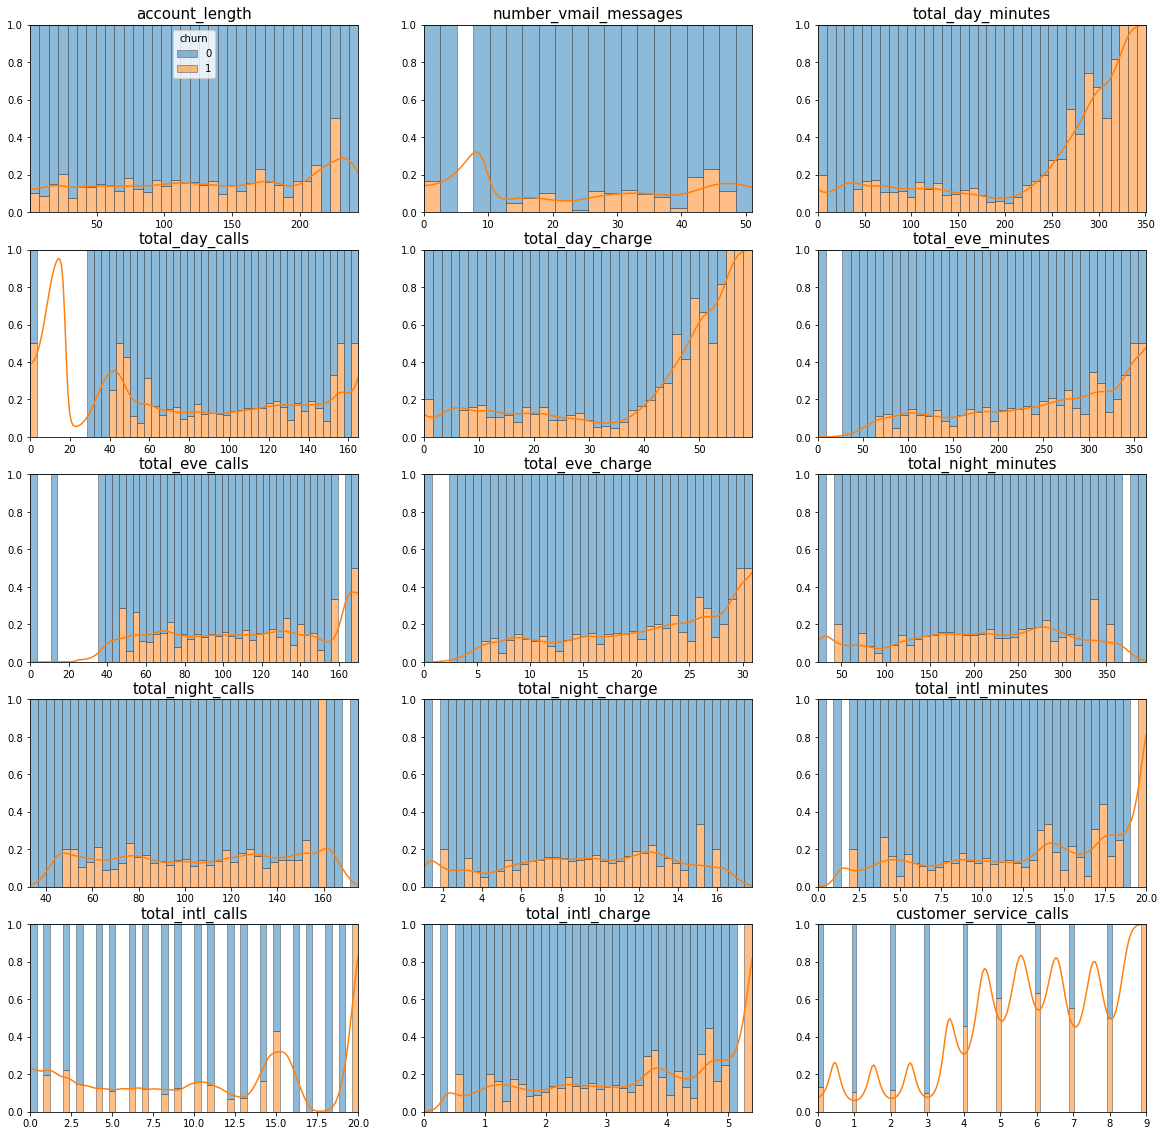

In [19]:
# Create Figure and Axes
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20,20))

# Loop through columns
for idx, col in enumerate(columns_plot):
    
    # Calculate chart position
    col_n = idx % 3
    row_n = idx // 3
    
    # Plot Histogram, depending on the subplot I'm going to add a legend or not
    if col_n == 0 and row_n == 0:
        sns.histplot(data=df, x=col, hue="churn", multiple="fill", edgecolor=".3", 
                     linewidth=.5, ax=axes[row_n][col_n], kde=True)
    else:
        sns.histplot(data=df, x=col, hue="churn", multiple="fill", edgecolor=".3", 
                     linewidth=.5, ax=axes[row_n][col_n], kde=True, legend=None)
    
    # Set Labels and titles
    axes[row_n][col_n].set_ylabel(None)
    axes[row_n][col_n].set_xlabel(None)
    axes[row_n][col_n].set_title(col, size=15)

plt.show();

#### Conclusions:
- High values of `total_day_minutes` and `total_day_charge` have only churned clients.
- Similar behavior for `total_eve_minutes` and `total_eve_charge` with less intensity.
- As the No. of `customer_service_calls` increase the probability of it being churned increases as well.

**[Go back to Table of Contents](#toc)**

## Correlation Matrix <a class="anchor" id="exp4"></a>

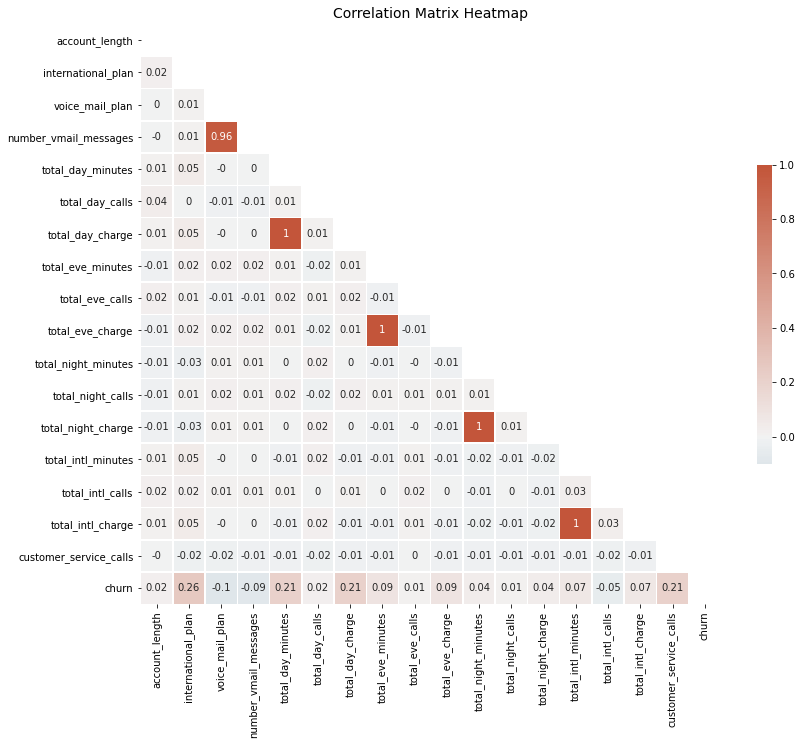

In [20]:
# Correlation numbers
corr = df.corr().round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Title
plt.title('Correlation Matrix Heatmap', size=14);

#### Conclusions:
- `international_plan`, `total_day_minutes`, `total_day_charge` and `customer_service_calls`: All of these features have the highest correlation with `churn`. However, there's no feature with a really big correlation (>= 0.75).
- Some features have direct correlation with each other, for example, `total_intl_minutes and total_intl_charge` indicating that it might not be necessary to have both features in the model.

**[Go back to Table of Contents](#toc)**

## No. of Customers by State by Churn Status <a class="anchor" id="exp5"></a>
I want to see the No. of Customers by State and Churn Status. I'm trying to understand whether certain states have higher chances of churning than others.

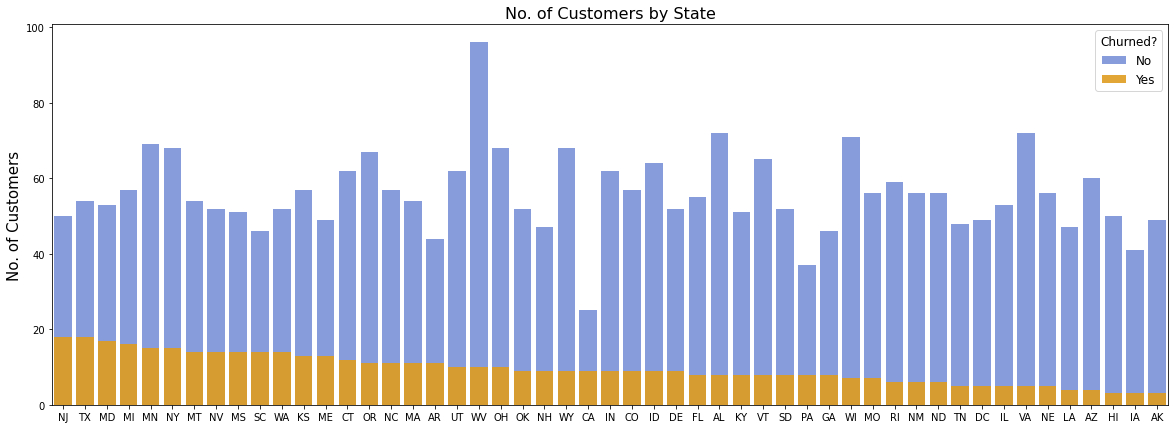

In [21]:
# Calculate No. of Customers by State by Churn Status
# Create a Pivot Table to Plot, rename columns and sort values
to_plot = df.pivot_table(index='state', columns='churn', values='area_code', aggfunc='count').reset_index()
to_plot.columns = ['state', 'false', 'true']
to_plot = to_plot.sort_values('true', ascending=False).reset_index(drop=True)

# Plot
plt.figure(figsize=(20,7))

# Two bar charts
s1 = sns.barplot(x = 'state', y = 'false', data = to_plot, color = 'royalblue', alpha=0.7, label='No')
s2 = sns.barplot(x = 'state', y = 'true', data = to_plot, color = 'orange', alpha=0.9, label='Yes')

# Title, labels and legend
plt.title('No. of Customers by State', size=16)
plt.ylabel('No. of Customers', size=15)
plt.xlabel(None)
plt.legend(title='Churned?', prop={'size': 12}, title_fontsize=12)

plt.show();

#### Conclusions:
- Some States have higher churn rate than others
- The No. of Customers by State is unbalaced which could represent a challenge to my model.

#### What's the percentage of churned records in the dataset?

In [22]:
df['churn'].value_counts() / len(df['churn'])

0    0.855086
1    0.144914
Name: churn, dtype: float64

Non-Churned clients represent 85% of the dataset!

**[Go back to Table of Contents](#toc)**

## Churn Rate by State <a class="anchor" id="exp6"></a>
Now I want to see the Churn Rate by State

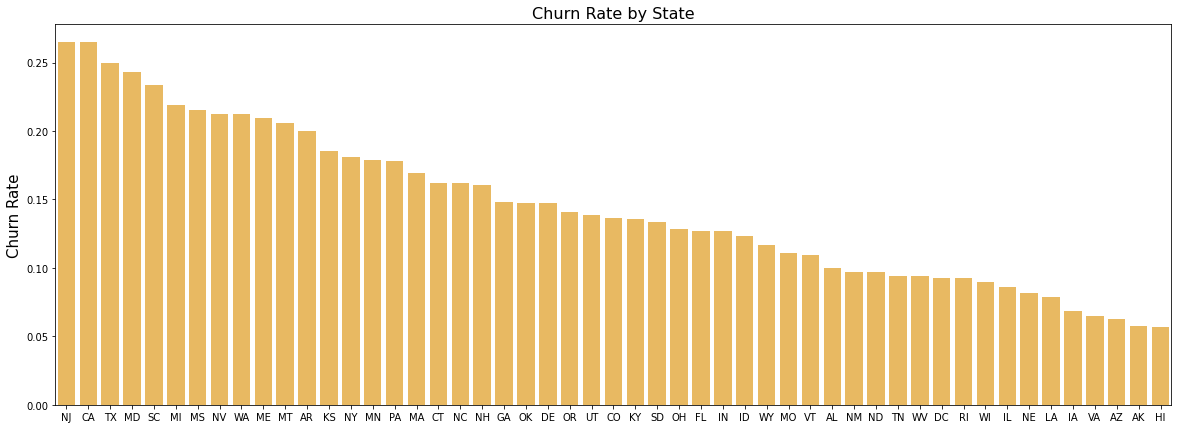

In [23]:
# Calculate Churn Rate by State
# Create a Pivot Table to Plot, rename columns and sort values
to_plot['total'] = to_plot['true'] + to_plot['false']
to_plot['churn_rate'] = to_plot['true'] / to_plot['total']
to_plot = to_plot.sort_values('churn_rate', ascending=False).reset_index(drop=True)

# Plot
plt.figure(figsize=(20,7))

# Create Bar Plot
sns.barplot(x = 'state', y = 'churn_rate', data = to_plot, color = 'orange', alpha=0.7)

# Title and labels
plt.title('Churn Rate by State', size=16)
plt.ylabel('Churn Rate', size=15)
plt.xlabel(None)

plt.show();

#### Conclusions:
- The Churn Rate could be a good feature to be part of my model.
- From a business standpoint I'd think it would be a good idea to understand what's going on in `NJ/CA/TX/MD/SC` and to help prioritize I'd also look at the absosulte values. California, for example, has a high rate, however, when you look at the absolute values it might not be top priority since it will have lower impact on Revenue than others.

**[Go back to Table of Contents](#toc)**

## Churn Rate and Absolute Values of Churned Records by State <a class="anchor" id="exp7"></a>
Now I'm going to put both charts together so I can compare both numbers.

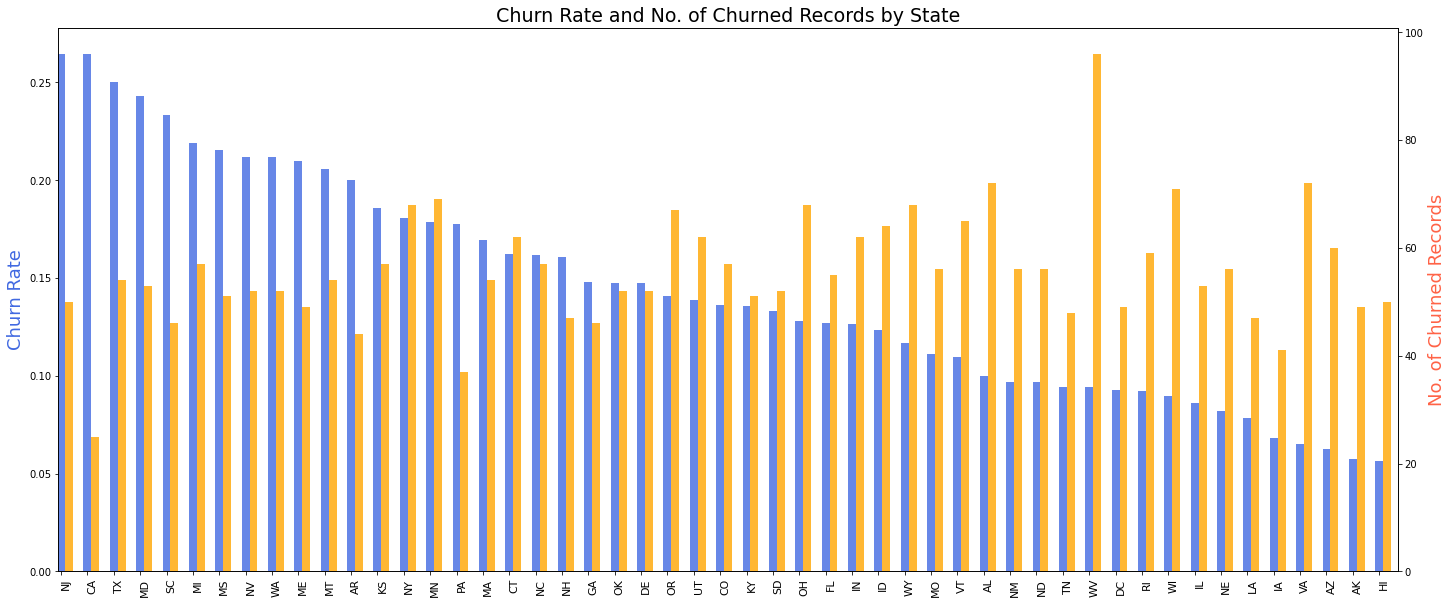

In [24]:
# Create Figure
fig = plt.figure(figsize=(24,10))

# Create matplotlib axes and secondary axes
ax = fig.add_subplot(111) 
ax2 = ax.twinx()

# Plot
width = 0.3
to_plot.plot.bar('state', 'churn_rate', legend=False, width=width,
                   ax=ax, position=1, align='edge', color='royalblue', alpha=0.8)
to_plot.plot.bar('state', 'false', legend=False, width=width,
                   ax=ax2, position=0, align='edge', color='orange', alpha=0.8)

# Create Title and Labels.
plt.title('Churn Rate and No. of Churned Records by State', size=19)
ax.set_ylabel('Churn Rate', color='royalblue', size=18)
ax2.set_ylabel('No. of Churned Records', color='tomato', size=18)
ax.set_xlabel(None)
ax2.set_xlabel(None)
ax.set_xticklabels(to_plot['state'], fontsize = 11, ha='left')

plt.show();

#### Conclusions:
- With the No. of Churned Records in addition to the Churn Rate, the analysis becomes more insightful since we would allocate resources to states that would have a higher impact on the business. For example, `WV` has low Churn Rate relative to others, however, it has the highest No. of Churned Records. 
- Another interesting data point to bring would be the Value (in USD) of each client for the business and also estimate the cost of reducing churn rate. With these data points, we could run different scenarios and optimize efforts on reducing Churned Clients.

**[Go back to Table of Contents](#toc)**

## Distribution of Total Minutes, Calls and Charges by Churn Status <a class="anchor" id="exp8"></a>

In [25]:
# Calculate Totals
df['total_minutes'] = (df['total_day_minutes'] + df['total_eve_minutes'] + 
                       df['total_intl_minutes'] + df['total_night_minutes'])
df['total_calls'] = (df['total_day_calls'] + df['total_eve_calls'] + 
                     df['total_intl_calls'] + df['total_night_calls'])
df['total_charge'] = (df['total_day_charge'] + df['total_eve_charge'] + 
                      df['total_intl_charge'] + df['total_night_charge'])                    

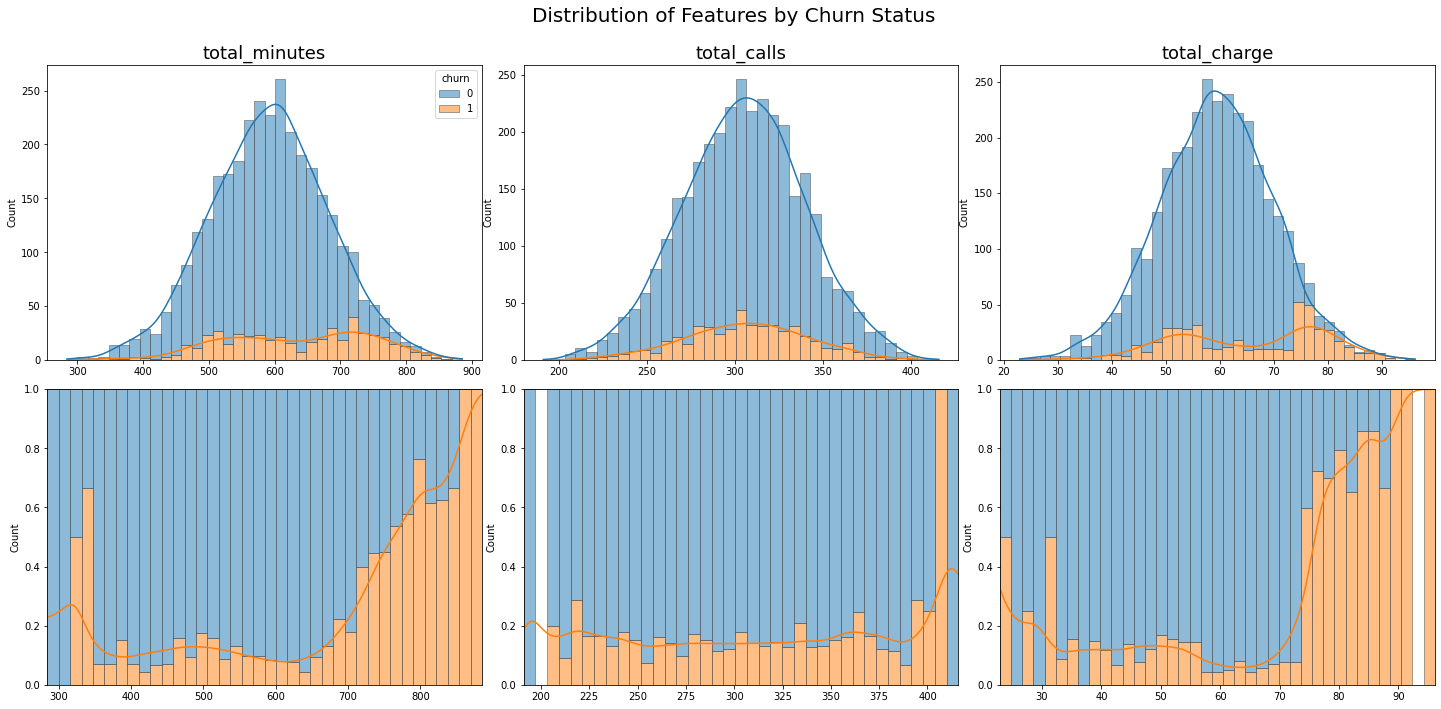

In [26]:
# Create Figure and Axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

# Tight Layout of Figure - Make charts closer to each other
fig.tight_layout()

# Loop through columns
for idx, col in enumerate(['total_minutes', 'total_calls', 'total_charge']):
    
    # If first column and first row then then include the legend
    # First Row Chart: Stacked Histogram
    if idx == 0:
        sns.histplot(data=df, x=col, hue="churn", multiple="stack", edgecolor=".3", 
                     linewidth=.5, ax=axes[0][idx], kde=True)
    else:
        sns.histplot(data=df, x=col, hue="churn", multiple="stack", edgecolor=".3", 
                     linewidth=.5, ax=axes[0][idx], kde=True, legend=None)
        
    # Second Row Chart: Filled Histogram
    sns.histplot(data=df, x=col, hue="churn", multiple="fill", edgecolor=".3", 
                 linewidth=.5, ax=axes[1][idx], kde=True, legend=None)
    
    # Adjust Labels and Title
    axes[0][idx].set_xlabel(None)
    axes[1][idx].set_xlabel(None)
    axes[0][idx].set_title(col, size=18)
    
# Set Title
fig.suptitle("Distribution of Features by Churn Status", fontsize=20)

# Adjust Header Space
plt.subplots_adjust(top=0.90)
plt.show();

#### Conclusions:
- As `total_minutes` and `total_charge` increases the chance of having a churned client also increases.

**[Go back to Table of Contents](#toc)**

## Analyze Outliers <a class="anchor" id="exp9"></a>

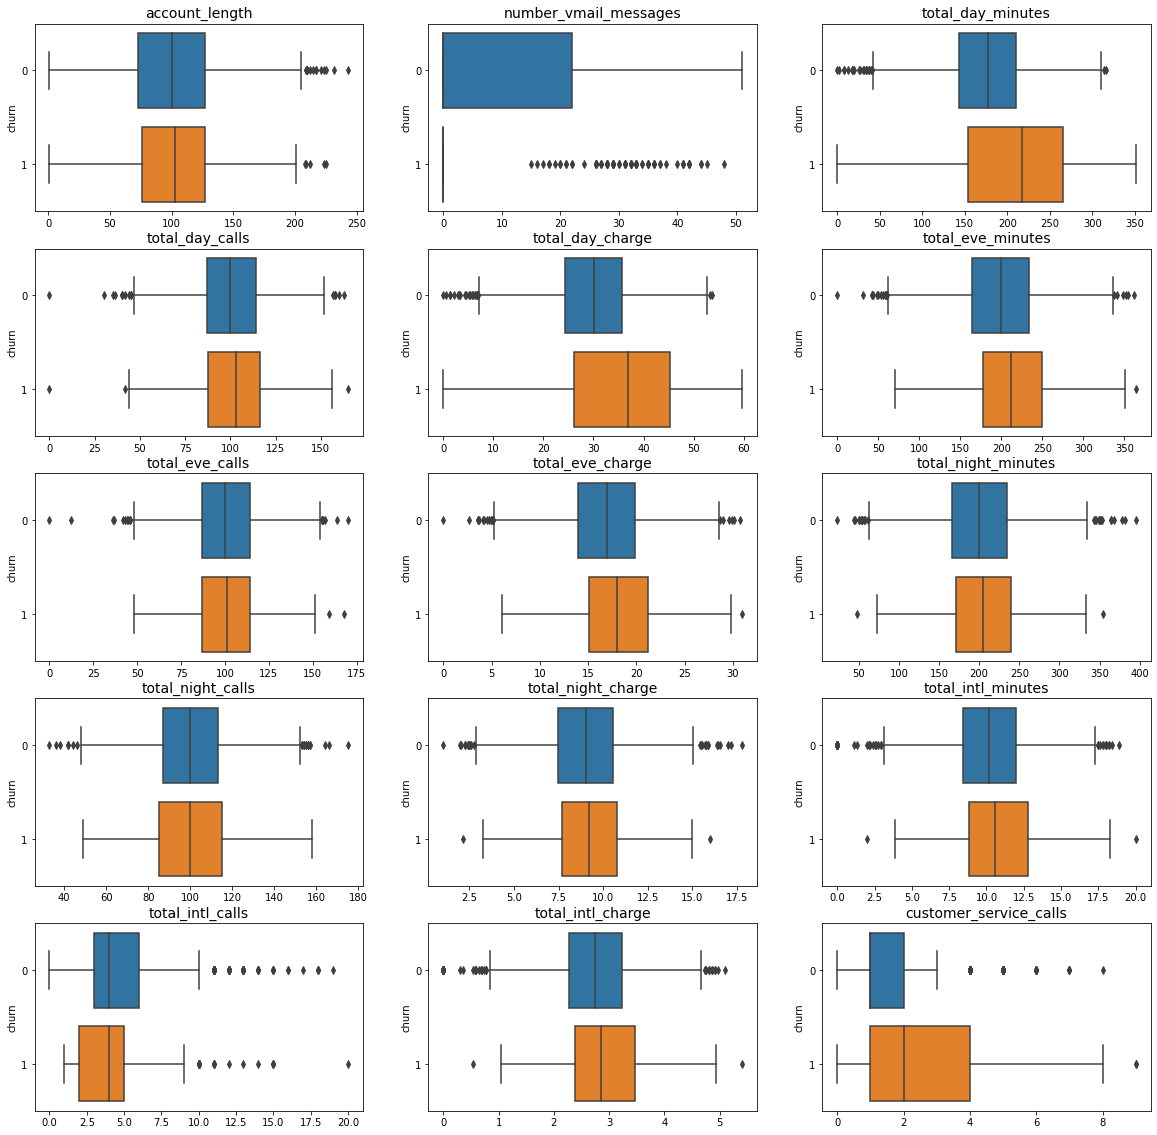

In [27]:
# Create Figure and Axes
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20,20))

# Loop through columns we are plotting
for idx, col in enumerate(columns_plot):
    
    # Calculate chart position
    col_n = idx % 3
    row_n = idx // 3
    
    sns.boxplot(data=df, y='churn', x=col, orient='h', ax=axes[row_n][col_n])
    
    # Set Labels and titles
    axes[row_n][col_n].set_xlabel(None)
    axes[row_n][col_n].set_title(col, size=14)

plt.show();

#### Conclusions:
- `number_vmail_messages`: Churned clients tend not to have voice mail messages. It's possible to see that all records with messages are considered as outliers.
- `total_day_minutes and total_day_charge` + `total_eve_minutes and total_eve_charge`: Churned clients, as seen before, have higher minutes and more charges.
- `customer_service_calls`: As seen before, Churned Clients tend to have more Customer Service Calls, while for Non-Churned clients, records with more than 3 are considered outliers.

**[Go back to Table of Contents](#toc)**

# Modeling <a class="anchor" id="model"></a>
## One-hot Encoding <a class="anchor" id="model1"></a>
I noticed that a few features are categorical and to be able to train my models I need to do one-hot encoding of them.

In [28]:
# Create copy to start transforming the data
data = df.copy()

# One-Hot Encoding
data = pd.get_dummies(df, columns=['state', 'area_code'], drop_first=True)
data = data.drop('phone_number', axis=1)

## Define `X` and `y` + Train/Test Split <a class="anchor" id="model2"></a>

In [29]:
# Define X and y
y = data['churn'].astype(int)
X = data.drop('churn', axis=1)

# Convert features to numeric
X['international_plan'] = X['international_plan'].astype(int)
X['voice_mail_plan'] = X['voice_mail_plan'].astype(int)

In [30]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

## Feature Scaling <a class="anchor" id="model3"></a>
Since features have different scales I should scale them even though that might not make any difference for certain algorithms.

In [31]:
# Create instance of scaler
scaler = StandardScaler()

# Fit and Transform features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**[Go back to Table of Contents](#toc)**
## K-Nearest Neighbors Classifier <a class="anchor" id="model4"></a>
### Find the best No. of Neighbors <a class="anchor" id="model5"></a>

In [32]:
# Create Function to try different N-Neighbors
def knclf_report(X_train, X_test, y_train, y_test, lst, model_name):
    """
    Function to fit and test KNeighborsClassifier models and store metrics for the training and 
    test sets.

    Args:
        X_train(pandas.DataFrame or pandas.Series): Contains the training set of independent variables.
        X_test(pandas.DataFrame or pandas.Series): Contains the test set of independent variables.
        y_train(pandas.DataFrame or pandas.Series): Contains the training set of the dependent variable.
        y_test(pandas.DataFrame or pandas.Series): Contains the test set of the dependent variable.
        lst(list): List to store metrics.
        model_name(str): Custom Model Name to be able to identify the model on the list.
    """
    # Loop through different Number of Neighbors (one to fourteen)
    for n in range(1, 15):

        # Create Instance of Model
        kn_cl = KNeighborsClassifier(n_neighbors=n)

        # Fit Model
        kn_cl.fit(X_train, y_train)

        # Predict
        y_hat_test = kn_cl.predict(X_test)
        y_hat_train = kn_cl.predict(X_train)

        # Confusion Matrix - Test
        conf_matrix_test = confusion_matrix(y_test, y_hat_test)
        # Extract False/True Negatives/Positives
        tn_test = conf_matrix_test[0][0]
        fp_test = conf_matrix_test[0][1]
        fn_test = conf_matrix_test[1][0]
        tp_test = conf_matrix_test[1][1]
        
        # Confusion Matrix - Train
        conf_matrix_train = confusion_matrix(y_train, y_hat_train)
        # Extract False/True Negatives/Positives
        tn_train = conf_matrix_train[0][0]
        fp_train = conf_matrix_train[0][1]
        fn_train = conf_matrix_train[1][0]
        tp_train = conf_matrix_train[1][1]

        # Calculate Metrics - Test
        ps_test = precision_score(y_test, y_hat_test)
        rs_test = recall_score(y_test, y_hat_test)
        acc_test = accuracy_score(y_test, y_hat_test)
        f1_test = f1_score(y_test, y_hat_test)
        neg_pred_test = round((fn_test / (fn_test + fp_test)), 2)
        
        # Calculate Metrics - Train
        ps_train = precision_score(y_train, y_hat_train)
        rs_train = recall_score(y_train, y_hat_train)
        acc_train = accuracy_score(y_train, y_hat_train)
        f1_train = f1_score(y_train, y_hat_train)
        neg_pred_train = round((fn_train / (fn_train + fp_train)), 2)

        # Append Results
        lst.append([n, ps_train, rs_train, acc_train, f1_train, neg_pred_train, 
                    tn_train, fn_train, fp_train, tp_train, model_name, 'train'])
        lst.append([n, ps_test, rs_test, acc_test, f1_test, neg_pred_test, 
                    tn_test, fn_test, fp_test, tp_test, model_name, 'test'])

### Iterate through different dataset transformations <a class="anchor" id="model6"></a>
To find the best No. of Neighbors I'm going to run different iterations using different transformations of the dataset. 

### Baseline Model <a class="anchor" id="model7"></a>
To start, I'm going to create a baseline model with the original dataset.
> **Which metrics to Analyze?** <br>Since I'm trying to identify the No. of Churned Clients, I'm going to prioritize the **Recall Score**, which measures the capacity of predicting True Positives (churned clients in this case) since it takes `True Positives / (True Positives + False Negatives)`. <br>The **Accuracy Score** can be misleading since most of the data set contains non-churned customers and having a model that predicts everything as 'Not-Churned' would have a high accuracy score. <br>I'm also going to look at the **F1-Score** since it's the weighted average of the precision and recall and gives a more meaningful understanding of how the model is performing.

In [33]:
# Create empty list to store results of iterations
knn_results = []
        
#Run Report
knclf_report(X_train, X_test, y_train, y_test, knn_results, 'baseline')

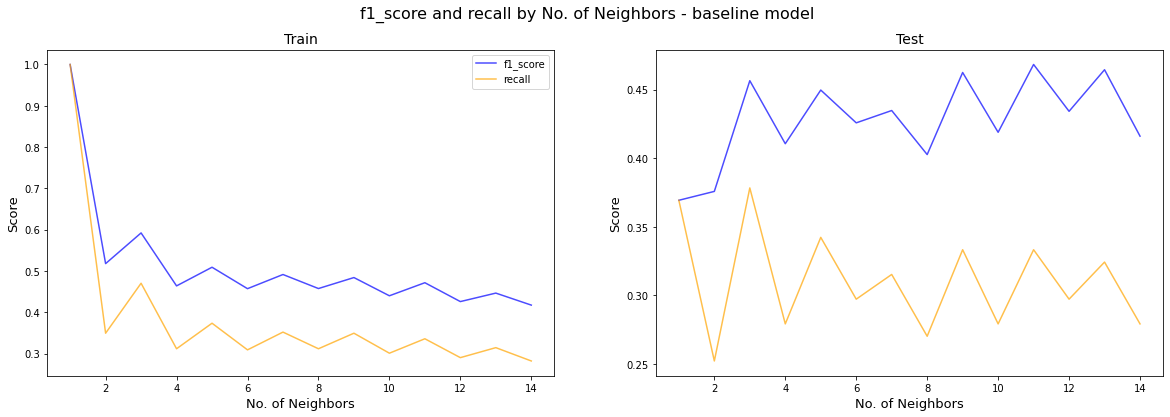

In [34]:
def knn_plot(lst, metric_1, metric_2, model_name):
    """
    Plot two metrics of a KNeighbors Classifier model for different No. of Neighbors with the goal of
    finding the optimal No. of Neighbors.

    Args:
        lst(list): List with Model Metrics.
        metric_1(str): First Metric Name.
        metric_2(str): Second Metric Name.
        model_name(str): Custom Model Name to identify which iteration to plot.
    """
    # Convert lst to DataFrame
    results_df = pd.DataFrame(lst, columns=['n_neighbors', 'precision', 'recall', 'accuracy', 
                                            'f1_score', 'neg_pred', 'true_neg', 
                                            'false_neg', 'false_pos', 'true_pos', 'model', 'split'])
    
    # Filter for chosen model and split dataframe into two (train and test)
    to_plot_train = results_df[(results_df['model'] == model_name) & (results_df['split'] == 'train')]
    to_plot_test = results_df[(results_df['model'] == model_name) & (results_df['split'] == 'test')]

    # Create Figure and Axes
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

    # Plot Metrics
    sns.lineplot(to_plot_train['n_neighbors'], to_plot_train[metric_1], color='blue', alpha=0.7, 
                 label=metric_1, err_style=None, ax=axes[0])
    sns.lineplot(to_plot_train['n_neighbors'], to_plot_train[metric_2], color='orange', alpha=0.7, 
                 label=metric_2, err_style=None, ax=axes[0])
    sns.lineplot(to_plot_test['n_neighbors'], to_plot_test[metric_1], color='blue', alpha=0.7, 
                 label=metric_1, err_style=None, ax=axes[1], legend=None)
    sns.lineplot(to_plot_test['n_neighbors'], to_plot_test[metric_2], color='orange', alpha=0.7, 
                 label=metric_2, err_style=None, ax=axes[1], legend=None)

    # Add Title, Labels and Legend
    fig.suptitle(f'{metric_1} and {metric_2} by No. of Neighbors - {model_name} model', fontsize=16)
    axes[0].set_title('Train', size=14)
    axes[1].set_title('Test', size=14)
    axes[0].set_xlabel('No. of Neighbors', size=13)
    axes[1].set_xlabel('No. of Neighbors', size=13)
    axes[0].set_ylabel('Score', size=13)
    axes[1].set_ylabel('Score', size=13)

    plt.show();

# Plot Baseline
knn_plot(knn_results, 'f1_score', 'recall', 'baseline')

Both Scores are very low and somewhat stable regardless of the No. of Neighbors. However, these are the baseline scores that I should try to improve so it's good to have them as a comparison.

### Scaled Features <a class="anchor" id="model8"></a>
Next, I'm going to scale the features and train the same model.

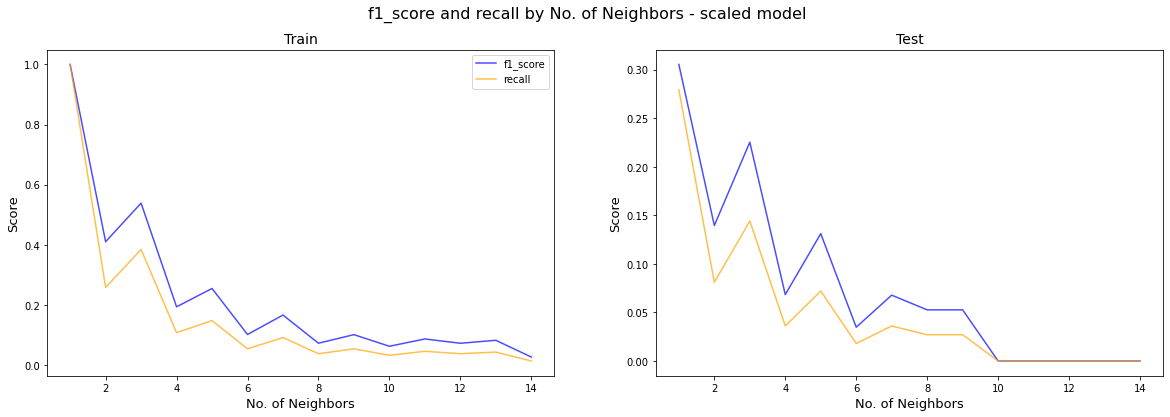

In [35]:
# Train new model + Store Metrics
knclf_report(X_train_scaled, X_test_scaled, y_train, y_test, knn_results, 'scaled')
# Plot Metrics for new model
knn_plot(knn_results, 'f1_score', 'recall', 'scaled')

It's interesting to see that scaled features performed worse overall but it seems like having three neighbors would be a good number.

### Normalized Features <a class="anchor" id="model9"></a>
Next, I'm going to take the Scaled dataset and normalize it

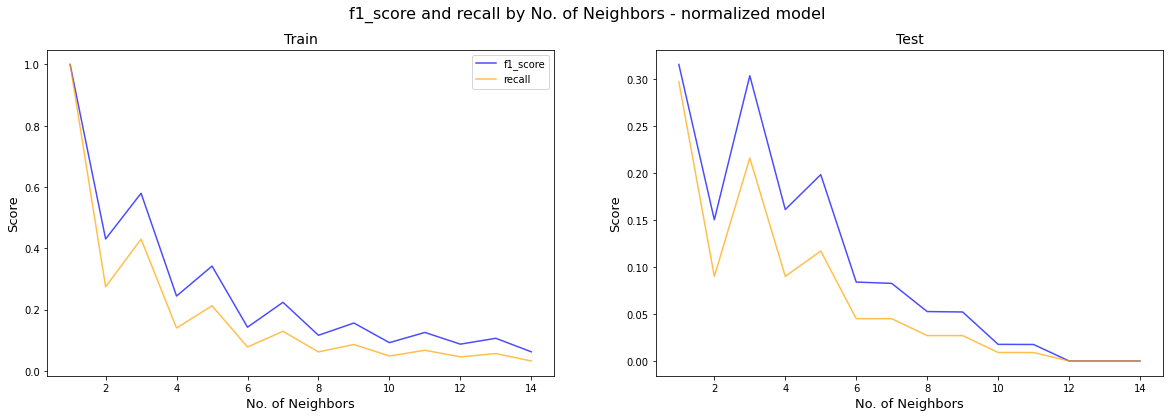

In [36]:
# Normalize Features
norm = Normalizer()
X_train_norm = norm.fit_transform(X_train_scaled)
X_test_norm = norm.transform(X_test_scaled)

# Train new model + Store Metrics
knclf_report(X_train_norm, X_test_norm, y_train, y_test, knn_results, 'normalized')

# Plot metrics for the new model
knn_plot(knn_results, 'f1_score', 'recall', 'normalized')

Not much has changed for the Trainig Set. However, the scores for the Test Set improved for `N Neighbors == 3`

### Address Class Imbalance Problem <a class="anchor" id="model10"></a>
It's going to be hard to achieve good scores with such an unbalanced dataset. Therefore, I'm going to address that problem by performing oversampling of the scaled and normalized dataset so the No. of Churned and Non-Churned customers have equal weight (50/50).

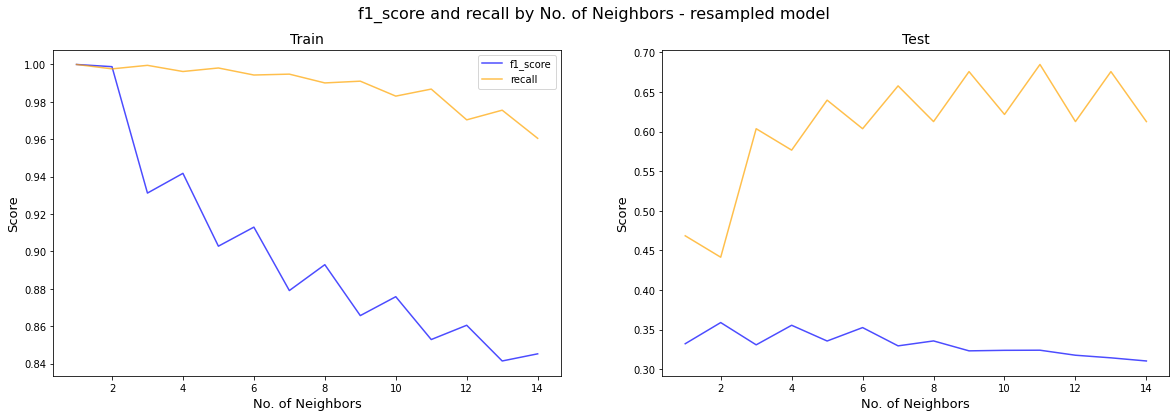

In [37]:
# Create instance of smote
smote = SMOTE(random_state=123)

# Create resampled version of the train dataset
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_norm, y_train)

# Run Report
knclf_report(X_train_resampled, X_test_norm, y_train_resampled, y_test, knn_results, 'resampled')

# Plot
knn_plot(knn_results, 'f1_score', 'recall', 'resampled')

Big improvement! Both scores improved drastically. Given the Recall score of the Test Set, maybe the best No. of Neighbors is five instead of three. It's interesting to see that the F1-Score for the Test Set is still low. Nonetheless, as explained before, it's more important to have higher Recall Score. Low F1 could represent a lot of False Positives.

### Resampled of Scaled (Non-Normalized) <a class="anchor" id="model11"></a>
Finally, on the interation, I'm going to perform oversampling of the scaled/non-normalized features to see the impact of normalization.

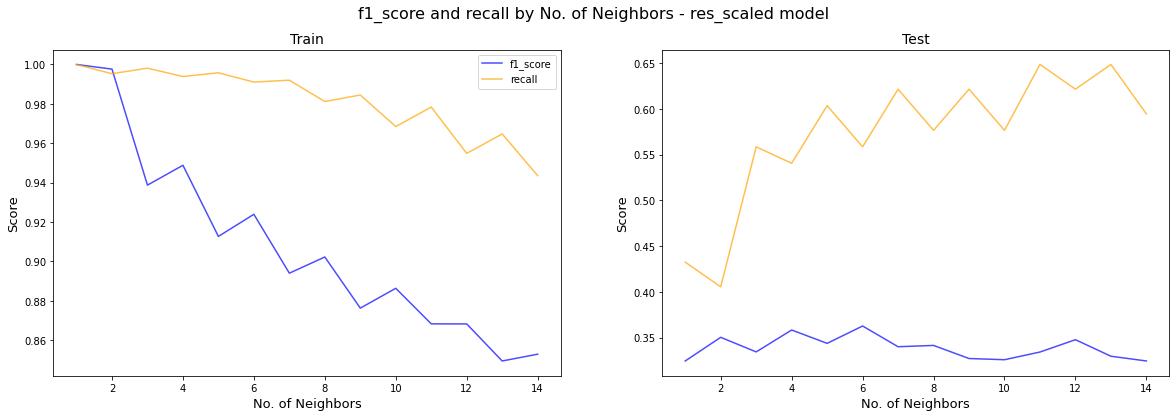

In [38]:
# Create instance of smote
smote = SMOTE(random_state=123)

# Create resampled version of the train dataset
X_train_resampled_sc, y_train_resampled_sc = smote.fit_resample(X_train_scaled, y_train)

# Run Report
knclf_report(X_train_resampled_sc, X_test_scaled, y_train_resampled_sc, y_test, knn_results, 'res_scaled')

# Plot
knn_plot(knn_results, 'f1_score', 'recall', 'res_scaled')

Performance is pretty much the same! But it looks like normalized features had slightly better Recall Score.

**[Go back to Table of Contents](#toc)**

### Compare Models <a class="anchor" id="model12"></a>
Finally, I'm going to put everything together and compare all different models.

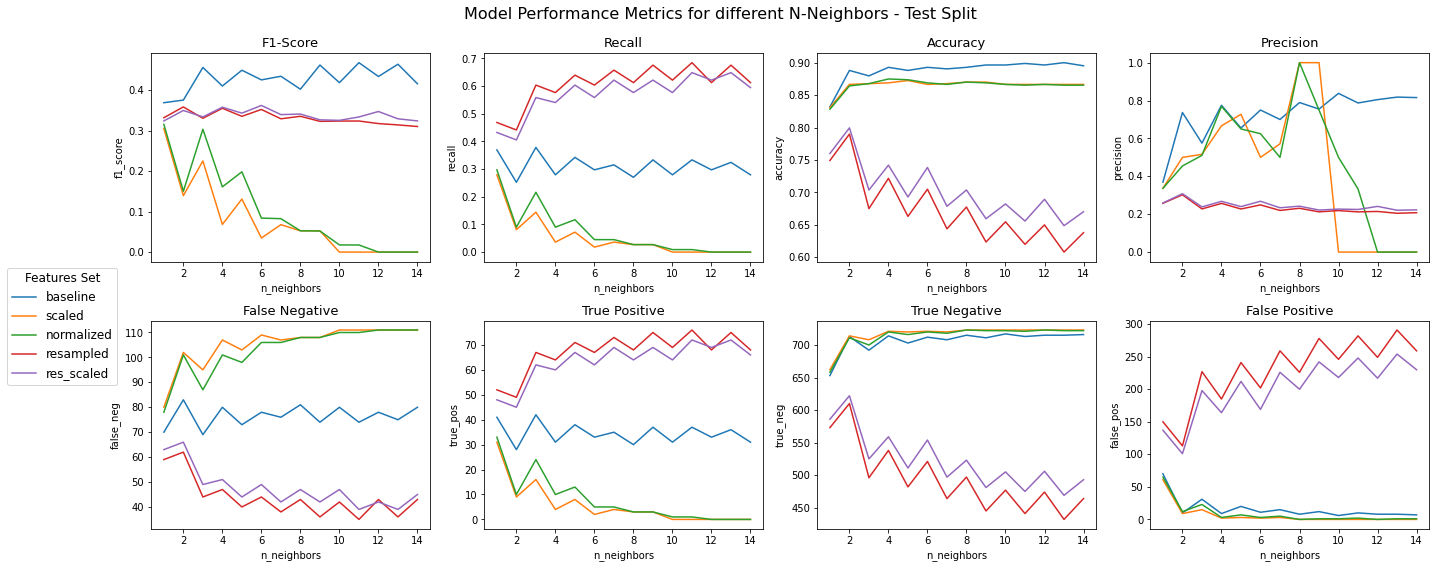

In [39]:
# Create DataFrame of models/metrics
results_df = pd.DataFrame(knn_results, columns=['n_neighbors', 'precision', 'recall', 'accuracy', 
                                                'f1_score', 'neg_pred', 'true_neg', 
                                                'false_neg', 'false_pos', 'true_pos', 'model', 'split'])

# Create Figure and Axes
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,8))

# Filter dataframe
to_plot = results_df[results_df['split'] == 'test']

# Plot Charts
sns.lineplot(x='n_neighbors', y='f1_score', hue='model', data=to_plot, ax=axes[0][0])
sns.lineplot(x='n_neighbors', y='recall', hue='model', data=to_plot, ax=axes[0][1], legend=None)
sns.lineplot(x='n_neighbors', y='accuracy', hue='model', data=to_plot, ax=axes[0][2], legend=None)
sns.lineplot(x='n_neighbors', y='precision', hue='model', data=to_plot, ax=axes[0][3], legend=None)
sns.lineplot(x='n_neighbors', y='false_neg', hue='model', data=to_plot, ax=axes[1][0], legend=None)
sns.lineplot(x='n_neighbors', y='true_pos', hue='model', data=to_plot, ax=axes[1][1], legend=None)
sns.lineplot(x='n_neighbors', y='true_neg', hue='model', data=to_plot, ax=axes[1][2], legend=None)
sns.lineplot(x='n_neighbors', y='false_pos', hue='model', data=to_plot, ax=axes[1][3], legend=None)

# Title/Label
axes[0][0].set_title('F1-Score', size=13)
axes[0][1].set_title('Recall', size=13)
axes[0][2].set_title('Accuracy', size=13)
axes[0][3].set_title('Precision', size=13)
axes[1][0].set_title('False Negative', size=13)
axes[1][1].set_title('True Positive', size=13)
axes[1][2].set_title('True Negative', size=13)
axes[1][3].set_title('False Positive', size=13)

# Adjust Legend
axes[0][0].legend(bbox_to_anchor=(-0.1, 0), title='Features Set', fontsize=12, title_fontsize=12)

# Set Title
fig.suptitle("Model Performance Metrics for different N-Neighbors - Test Split", fontsize=16)

# Add space between subplots
fig.tight_layout(h_pad=-8)

# Adjust Header Space
plt.subplots_adjust(top=0.90)
plt.show();

### Conclusions <a class="anchor" id="model13"></a>
- By comparing different models it's possible to see that the Baseline Model has the best `f1_score/accuracy`. However, that could be misleading since the model was trained on an unbalaced dataset. 
- When comparing `Resampled vs Others`, it's possible to see that the `No. of True Positive` predictions increased at the cost of reducing the `No. of True Negatives` and, consequently, increasing the `No. of False Positives` (with the Non-Normalized Resampled model with fewer records). Since the goal of the project is to predict whether a client will churn then it's okay to have `False Positives` but it's bad to have `False Negatives` because that would mean that the model would say that everything is okay with a client when in reality it will churn.
- From all steps taken, having a balanced set made a huge difference and definitely put me in the right direction. I'm just not entirely certain whether I should use the Normalized or Non-Normalized one.
- Resampled models performed better when looking at the `recall score`. However, it comes at the cost of reducing `precision` and `accuracy`. What's not very good to see is that the `No. of False Negatives` is around 40-50 records which means that they classify correclty only ~60/70% of the churned cases (which is what `recall` shows = ~0.6/0.7).
- To decide the best No. of Neighbors, I'd have to go back to the goal of the project which is to identify clients that will churn. Because of that, I'd say that **5/6** would be great choices given the `recall score` and the `No. of True Positives`. More neighbors than that would bring a marginal improvement at the cost of considerably decreasing `accuracy` and increasing the `No. of False Positives`.

### True vs False Positives Trade-off <a class="anchor" id="model14"></a>
> Having some False Positives is okay given the goal of the project. However, causing a lot of work to the company for no reason is a problem. 
>
> I'm not sure exactly what would happen after my model identifies that a client is about to churn. I believe it would trigger some action for Customer Support/Success to avoid that churn. 
>
> Therefore, if the model predicts that a lot of clients will churn that would also mean more work spent on False Positives and that's money lost for the company. Because of that, taking that trade-off into consideration is important and identifying the optimal model keeping in mind the balance between True and False Positives should be the goal.

**[Go back to Table of Contents](#toc)**

### Compare KNeighborsClassifier for `N-Neighbors = 5` <a class="anchor" id="model15"></a>

Now that I have defined the No. of Neighbors, I'm going to create a new function (somewhat similart to the previous one) so I can compare performance of different models.

In [40]:
# Create Function with Report
def model_report(model, X_train, X_test, y_train, y_test, lst, sample_set, model_name):
    """
    Function to fit and test a Classification Model, generate metrics and store them in a list.

    Args:
        model(sklearn.model): Instance of a Classification Model.
        X_train(pandas.DataFrame or pandas.Series): Contains the training set of independent variables.
        X_test(pandas.DataFrame or pandas.Series): Contains the test set of independent variables.
        y_train(pandas.DataFrame or pandas.Series): Contains the training set of the dependent variable.
        y_test(pandas.DataFrame or pandas.Series): Contains the test set of the dependent variable.
        lst(list): List to store metrics.
        sample_set(str): Custom data set name to able to identify the model's performance.
        model_name(str): Custom Model Name to be able to identify the model on the list.
        
    Return:
        model(sklearn.model): Trained model instance
    """
    # Train Model
    model.fit(X_train, y_train)

    # Predict
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)

    # Confusion Matrix
    conf_matrix_train = confusion_matrix(y_train, y_hat_train)
    conf_matrix_test = confusion_matrix(y_test, y_hat_test)
    
    # True/False Positive/Negative
    tn_train = conf_matrix_train[0][0]
    fp_train = conf_matrix_train[0][1]
    fn_train = conf_matrix_train[1][0]
    tp_train = conf_matrix_train[1][1]
    tn_test = conf_matrix_test[0][0]
    fp_test = conf_matrix_test[0][1]
    fn_test = conf_matrix_test[1][0]
    tp_test = conf_matrix_test[1][1]

    # Calculate Metrics
    ps_test = round(precision_score(y_test, y_hat_test), 2)
    ps_train = round(precision_score(y_train, y_hat_train), 2)
    rs_test = round(recall_score(y_test, y_hat_test), 2)
    rs_train = round(recall_score(y_train, y_hat_train), 2)
    acc_test = round(accuracy_score(y_test, y_hat_test), 2)
    acc_train = round(accuracy_score(y_train, y_hat_train), 2)
    f1_test = round(f1_score(y_test, y_hat_test), 2)
    f1_train = round(f1_score(y_train, y_hat_train), 2)
    neg_pred_test = round((fn_test / (fn_test + fp_test)), 2)
    neg_pred_train = round((fn_train / (fn_train + fp_train)), 2)
    
    # Append Results to lst
    lst.append([ps_train, rs_train, acc_train, f1_train, neg_pred_train, 
                tn_train, fn_train, fp_train, tp_train, sample_set, model_name, 'train'])
    lst.append([ps_test, rs_test, acc_test, f1_test, neg_pred_test, 
                tn_test, fn_test, fp_test, tp_test, sample_set, model_name, 'test'])
    
    # Print Report
    print(f'Train \nPrecision: {ps_train} | Recall: {rs_train} | Accuracy: {acc_train}')
    print(f'F1-Score: {f1_train} | Neg Predictive: {neg_pred_train}')
    print('Confusion Matrix\n', conf_matrix_train)
    print('')
    print(f'Test \nPrecision: {ps_test} | Recall: {rs_test} | Accuracy: {acc_test}')
    print(f'F1-Score: {f1_test} | Neg Predictive: {neg_pred_test}')
    print('Confusion Matrix\n', conf_matrix_test)
    
    return model

# Create Empty List to Store metrics
model_results = []

As stated before, I'm going to use `5` as the Number of Neighbors.
### Baseline

In [41]:
# Create Instance of Model
knn_cl = KNeighborsClassifier(n_neighbors=5)

# Generate Report
knn_baseline = model_report(knn_cl, X_train, X_test, y_train, y_test, model_results, 'baseline', 'knn')

Train 
Precision: 0.8 | Recall: 0.37 | Accuracy: 0.89
F1-Score: 0.51 | Neg Predictive: 0.87
Confusion Matrix
 [[2092   35]
 [ 233  139]]

Test 
Precision: 0.66 | Recall: 0.34 | Accuracy: 0.89
F1-Score: 0.45 | Neg Predictive: 0.78
Confusion Matrix
 [[703  20]
 [ 73  38]]


### Scaled Features

In [42]:
# Scaled Features
knn_scaled = model_report(knn_cl, X_train_scaled, X_test_scaled, y_train, y_test, model_results, 'scaled', 'knn')

Train 
Precision: 0.92 | Recall: 0.15 | Accuracy: 0.87
F1-Score: 0.25 | Neg Predictive: 0.98
Confusion Matrix
 [[2122    5]
 [ 317   55]]

Test 
Precision: 0.73 | Recall: 0.07 | Accuracy: 0.87
F1-Score: 0.13 | Neg Predictive: 0.97
Confusion Matrix
 [[720   3]
 [103   8]]


### Scaled + Normalized Features

In [43]:
# Normalized + Resampled + Scaled Features
knn_norm = model_report(knn_cl, X_train_norm, X_test_norm, y_train, y_test, model_results, 'normalized', 'knn')

Train 
Precision: 0.88 | Recall: 0.21 | Accuracy: 0.88
F1-Score: 0.34 | Neg Predictive: 0.96
Confusion Matrix
 [[2116   11]
 [ 293   79]]

Test 
Precision: 0.65 | Recall: 0.12 | Accuracy: 0.87
F1-Score: 0.2 | Neg Predictive: 0.93
Confusion Matrix
 [[716   7]
 [ 98  13]]


### Scaled + Normalized + Resampled Features

In [44]:
# Resampled + Scaled Features
knn_resampled = model_report(knn_cl, X_train_resampled, X_test_norm, y_train_resampled, y_test, 
                             model_results, 'resampled', 'knn')

Train 
Precision: 0.82 | Recall: 1.0 | Accuracy: 0.89
F1-Score: 0.9 | Neg Predictive: 0.01
Confusion Matrix
 [[1674  453]
 [   4 2123]]

Test 
Precision: 0.23 | Recall: 0.64 | Accuracy: 0.66
F1-Score: 0.34 | Neg Predictive: 0.14
Confusion Matrix
 [[482 241]
 [ 40  71]]


### Scaled + Resampled Features

In [45]:
# Resampled + Scaled Features
knn_resampled_sc = model_report(knn_cl, X_train_resampled_sc, X_test_scaled, y_train_resampled_sc, y_test, 
                                model_results, 'res_scaled', 'knn')

Train 
Precision: 0.84 | Recall: 1.0 | Accuracy: 0.9
F1-Score: 0.91 | Neg Predictive: 0.02
Confusion Matrix
 [[1731  396]
 [   9 2118]]

Test 
Precision: 0.24 | Recall: 0.6 | Accuracy: 0.69
F1-Score: 0.34 | Neg Predictive: 0.17
Confusion Matrix
 [[511 212]
 [ 44  67]]


Create function to plot metrics and compare performance for different feature sets

In [46]:
def plot_metrics(model_results, model_name, model_title):
    """
    Function to plot different metrics for a given model comparing different sample sets.

    Args:
        model_results(lst): List with metrics and model/sample names.
        model_name(str): The name of the model that will be plotted.
        model_title(str): Custom Plot Title.
    """

    # Convert it to a DataFrame
    model_results_df = pd.DataFrame(model_results)
    model_results_df.columns = ['precision', 'recall', 'accuracy', 'f1_score', 'neg_pred',
                                'true_neg', 'false_neg', 'false_pos', 'true_pos', 'sample_set', 'model', 'split']
    
    # Filter for chosen model
    model_results_df = model_results_df[model_results_df['model'] == model_name]

    # Create Figure and Axes
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
    
    # Loop through Fields we will plot
    for i, pair in enumerate([('f1_score', 'F1-Score'),
                               ('accuracy', 'Accuracy'), 
                               ('recall', 'Recall'),
                               ('true_pos', 'True Positive'), 
                               ('false_neg', 'False Negative'),
                               ('false_pos', 'False Positive')]):
        
        # Calculate chart position
        col_n = i % 3
        row_n = i // 3
        
        # Define Field and Title variables
        field = pair[0]
        title = pair[1]
        
        # Print Bar Plot
        sns.barplot(data=model_results_df, x='sample_set', y=field, hue='split', ci=None, ax=axes[row_n][col_n])
        
        # Set Title
        axes[row_n][col_n].set_title(title, size=13)
        
        # If first row then set Y-Axis Range
        if row_n == 0:
            axes[row_n][col_n].set(ylim=(0, 1))
            
        # If first chart then print legend, else removes it
        if (row_n == 0) & (col_n == 0):
            axes[row_n][col_n].legend(bbox_to_anchor=(-0.1, 0), title='Data Split', fontsize=12, title_fontsize=12)
        else:
            axes[row_n][col_n].get_legend().remove()
            
        # Remove X/Y Labels
        axes[row_n][col_n].set_xlabel(None)
        axes[row_n][col_n].set_ylabel(None)
    
    # Set Title
    fig.suptitle(model_title, fontsize=18)
    
    # Adjust Header Space
    plt.subplots_adjust(top=0.92)
    plt.show();

### Analyze Results <a class="anchor" id="model16"></a>

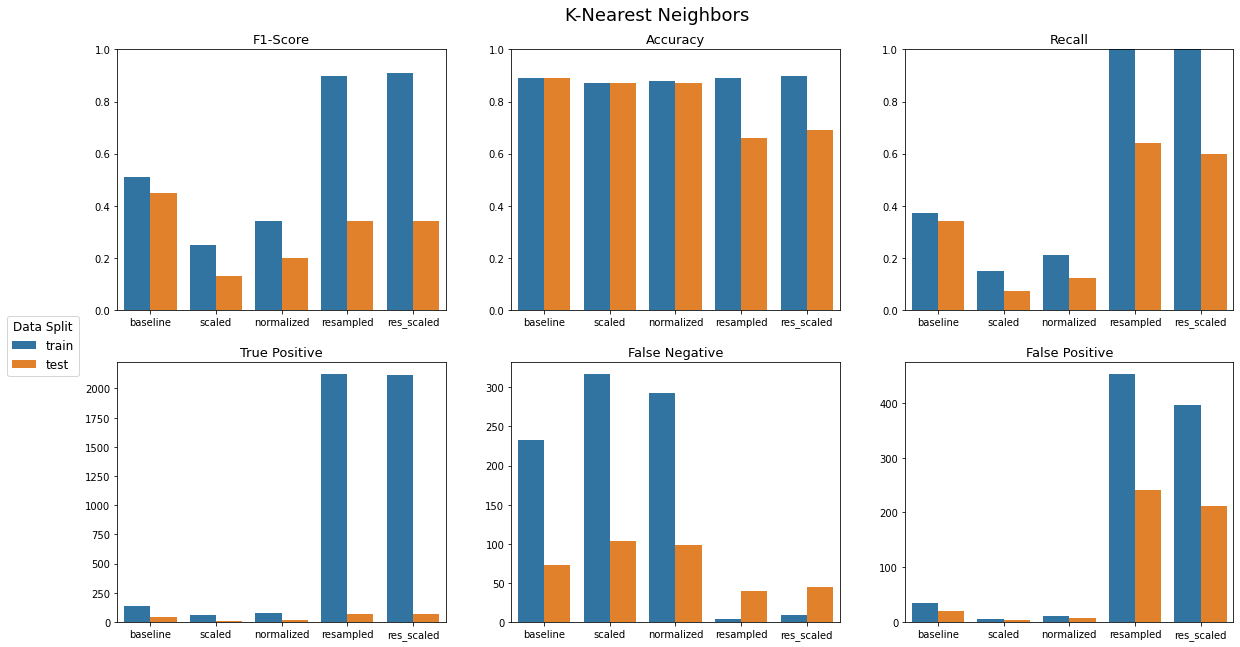

In [47]:
# Plot Metrics
plot_metrics(model_results, 'knn', 'K-Nearest Neighbors')

### Conclusions:
- It's interesting to see that the `F1-Score` improved drastically after resampling.
- As expected, `Accuracy` dropped after resampling and that's because most of the data is of Non-Churned clients (85%, specifically). Therefore, having a model that classifies everything as 'Not Churned' will have an accuracy score of 0.85. After resampling and making classes 50/50, the model will behave differently and classifying everything as 'Not Churned' won't maximize the score.
- `Recall` improved drastically after resampling, for the same reason as stated before. However, it's still very low (~0.6).

**[Go back to Table of Contents](#toc)**

## Logistic Regression <a class="anchor" id="model17"></a>
Next, I'm going to fit a Logistic Regression model.

### Baseline

In [48]:
# Instantiate LogisticRegression
logreg = LogisticRegression(fit_intercept=False, C=1e20, solver='liblinear', random_state=123)

# Generate Report
logreg_baseline = model_report(logreg, X_train, X_test, y_train, y_test, model_results, 'baseline', 'log_reg')

Train 
Precision: 0.56 | Recall: 0.2 | Accuracy: 0.86
F1-Score: 0.3 | Neg Predictive: 0.83
Confusion Matrix
 [[2067   60]
 [ 296   76]]

Test 
Precision: 0.57 | Recall: 0.23 | Accuracy: 0.87
F1-Score: 0.32 | Neg Predictive: 0.82
Confusion Matrix
 [[704  19]
 [ 86  25]]


### Scaled Features

In [49]:
# Scaled Features
log_reg_scaled = model_report(logreg, X_train_scaled, X_test_scaled, y_train, y_test, 
                              model_results, 'scaled', 'log_reg')

Train 
Precision: 0.29 | Recall: 0.87 | Accuracy: 0.66
F1-Score: 0.43 | Neg Predictive: 0.06
Confusion Matrix
 [[1324  803]
 [  47  325]]

Test 
Precision: 0.27 | Recall: 0.87 | Accuracy: 0.67
F1-Score: 0.41 | Neg Predictive: 0.05
Confusion Matrix
 [[460 263]
 [ 14  97]]


### Normalized + Scaled Features

In [50]:
# Normalized + Scaled Features
log_reg_norm = model_report(logreg, X_train_norm, X_test_norm, y_train, y_test, 
                            model_results, 'normalized', 'log_reg')

Train 
Precision: 0.29 | Recall: 0.87 | Accuracy: 0.67
F1-Score: 0.44 | Neg Predictive: 0.06
Confusion Matrix
 [[1351  776]
 [  49  323]]

Test 
Precision: 0.27 | Recall: 0.86 | Accuracy: 0.67
F1-Score: 0.41 | Neg Predictive: 0.05
Confusion Matrix
 [[463 260]
 [ 15  96]]


### Resampled + Normalized + Scaled Features

In [51]:
# Resampled + Normalized + Scaled Features
log_reg_resampled = model_report(logreg, X_train_resampled, X_test_norm, y_train_resampled, y_test, 
                                 model_results, 'resampled', 'log_reg')

Train 
Precision: 0.7 | Recall: 0.92 | Accuracy: 0.77
F1-Score: 0.8 | Neg Predictive: 0.16
Confusion Matrix
 [[1297  830]
 [ 160 1967]]

Test 
Precision: 0.25 | Recall: 0.87 | Accuracy: 0.64
F1-Score: 0.39 | Neg Predictive: 0.05
Confusion Matrix
 [[438 285]
 [ 14  97]]


### Resampled + Scaled

In [52]:
# Resampled + Scaled Features
log_reg_resampled_sc = model_report(logreg, X_train_resampled_sc, X_test_scaled, y_train_resampled_sc, y_test, 
                                    model_results, 'res_scaled', 'log_reg')

Train 
Precision: 0.7 | Recall: 0.93 | Accuracy: 0.77
F1-Score: 0.8 | Neg Predictive: 0.14
Confusion Matrix
 [[1283  844]
 [ 142 1985]]

Test 
Precision: 0.25 | Recall: 0.87 | Accuracy: 0.64
F1-Score: 0.39 | Neg Predictive: 0.05
Confusion Matrix
 [[439 284]
 [ 14  97]]


### Analyze Results <a class="anchor" id="model18"></a>

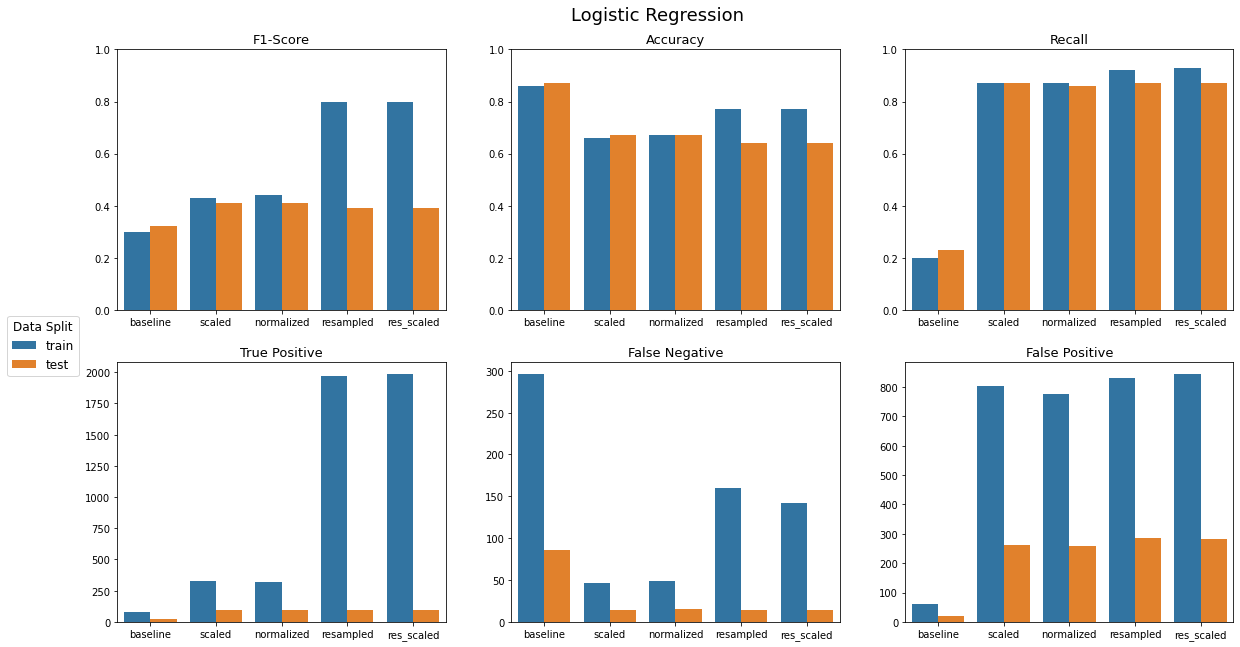

In [53]:
# Plot Results
plot_metrics(model_results, 'log_reg', 'Logistic Regression')

From this point, I'm going to refer to the models as:
- `Baseline`: First model trained on raw data with no transformation.
- `Scaled`: Second model trained on scaled features.
- `Normalized`: Third model trained on scaled and normalized features.
- `Resampled`: Fourth model trained on scaled, normalized and resampled features.
- `Resampled Scaled`: Fifth model trained on scaled and resampled features.

#### Conclusions:
- `F1-Score`: Dramatic improvement on Train F1-Score after resampling the dataset (`Resampled Models`), however, the same can't be seen when looking at the test set, which makes me think that the model is overfitting the Train set. As matter of fact, the Test F1-Score decreased after resampling.
- `Accuracy`: As expected the metric decreased (relative to `Baseline`) after performing transformations on the dataset. That's due to the unbalanced dataset that we are working with. The `Resampled Models` train set had a higher accuracy score. However, the test scores were similar to the `Scaled/Normalized models`.
- `Recall`: It's possible to see a big improvement on the metric after scaling the data (`Scaled Model`). The score on the test set is pretty much the same for the `Scaled, Normalized and Resampled Models`. The conclusion here is that there are no major improvements after scaling the set. Normalization and Resampling didn't improve the Recall Score on the test set.
- `True Positive / False Negative / False Positive`: It's interesting to see that even though the `Resampled Model` was trained on "new" observations, the No. of False Positive cases are the same as the `Scaled and Normalized Models`. I'd expect to see a similar chart as the True Positive and False Negative, with a bigger blue bar relative to the `Scaled and Normalized Models`.

**[Go back to Table of Contents](#toc)**

## Decision Tree <a class="anchor" id="model19"></a>
Next, I'm going to use a Decision Tree model in combination with GridSearchCV so I can test different hyperparameters and perform cross validation.

In [54]:
# Different Hyperparameters
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': list(range(1,6)),
              'max_features': [20, 40, 60, None]}

# Try Different Hyperparameters
dt_clf = GridSearchCV(DecisionTreeClassifier(random_state=123), param_grid, n_jobs=-1, scoring='recall')

### Baseline

In [55]:
# Generate Report
dt_clf_baseline = model_report(dt_clf, X_train, X_test, y_train, y_test, model_results, 'baseline', 'dt')

Train 
Precision: 1.0 | Recall: 0.86 | Accuracy: 0.98
F1-Score: 0.92 | Neg Predictive: 1.0
Confusion Matrix
 [[2127    0]
 [  52  320]]

Test 
Precision: 1.0 | Recall: 0.86 | Accuracy: 0.98
F1-Score: 0.92 | Neg Predictive: 1.0
Confusion Matrix
 [[723   0]
 [ 16  95]]


### Scaled Features

In [56]:
# Scaled Features
dt_clf_scaled = model_report(dt_clf, X_train_scaled, X_test_scaled, y_train, y_test,
                               model_results, 'scaled', 'dt')

Train 
Precision: 1.0 | Recall: 0.86 | Accuracy: 0.98
F1-Score: 0.92 | Neg Predictive: 1.0
Confusion Matrix
 [[2127    0]
 [  52  320]]

Test 
Precision: 1.0 | Recall: 0.86 | Accuracy: 0.98
F1-Score: 0.92 | Neg Predictive: 1.0
Confusion Matrix
 [[723   0]
 [ 16  95]]


### Scaled + Normalized Features

In [57]:
# Normalized + Resampled + Scaled Features
dt_clf_norm = model_report(dt_clf, X_train_norm, X_test_norm, y_train, y_test, 
                             model_results, 'normalized', 'dt')

Train 
Precision: 0.98 | Recall: 0.86 | Accuracy: 0.98
F1-Score: 0.91 | Neg Predictive: 0.87
Confusion Matrix
 [[2119    8]
 [  52  320]]

Test 
Precision: 0.86 | Recall: 0.8 | Accuracy: 0.96
F1-Score: 0.83 | Neg Predictive: 0.59
Confusion Matrix
 [[708  15]
 [ 22  89]]


### Scaled + Normalized + Resampeld Features

In [58]:
# Resampled + Normalized + Scaled Features
dt_clf_resampled = model_report(dt_clf, X_train_resampled, X_test_norm, y_train_resampled, y_test, 
                                  model_results, 'resampled', 'dt')

Train 
Precision: 0.87 | Recall: 0.84 | Accuracy: 0.86
F1-Score: 0.86 | Neg Predictive: 0.57
Confusion Matrix
 [[1868  259]
 [ 339 1788]]

Test 
Precision: 0.57 | Recall: 0.86 | Accuracy: 0.9
F1-Score: 0.69 | Neg Predictive: 0.17
Confusion Matrix
 [[651  72]
 [ 15  96]]


### Scaled + Resampeld Features

In [59]:
# Resampled + Scaled Features
dt_clf_resampled_sc = model_report(dt_clf, X_train_resampled_sc, X_test_scaled, y_train_resampled_sc, y_test, 
                                  model_results, 'res_scaled', 'dt')

Train 
Precision: 0.89 | Recall: 0.85 | Accuracy: 0.87
F1-Score: 0.87 | Neg Predictive: 0.59
Confusion Matrix
 [[1897  230]
 [ 329 1798]]

Test 
Precision: 0.6 | Recall: 0.87 | Accuracy: 0.91
F1-Score: 0.71 | Neg Predictive: 0.18
Confusion Matrix
 [[659  64]
 [ 14  97]]


### Analyze Results <a class="anchor" id="model20"></a>

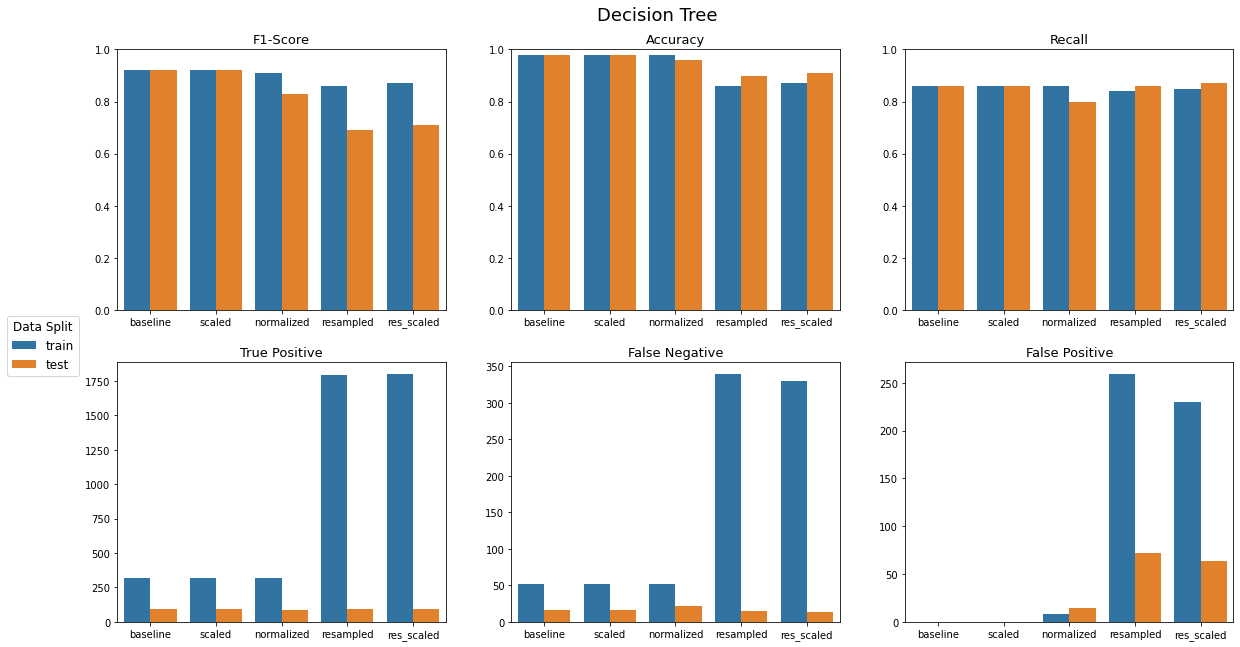

In [60]:
# Plot Metrics
plot_metrics(model_results, 'dt', 'Decision Tree')

#### Conclusions:
- Excluding the `Resampled Model`, it's clear that the model is overfitting the training set. The `F1-Score`, `Recall` and `Accuracy` scores are 1 (or very close to it) for the training set. If I decide to move forward with Decision Tree I need to address that problem.
- Focusing on the `Recall Score`, it's interesting to see a drop after normalizing the features and then an increase after resampling them.

**[Go back to Table of Contents](#toc)**

## Random Forest <a class="anchor" id="model21"></a>

Next I'm going to use a Random Forest model and also use `GridSearchCV` to try different hyperparameters.

In [61]:
# Different Hyperparameters
param_grid = {'n_estimators': [30, 50],
              'criterion': ['entropy', 'gini'],
              'min_samples_leaf': [5]}

# Try Different Hyperparameters
rf_clf = GridSearchCV(RandomForestClassifier(random_state=123), param_grid, 
                           scoring='recall', n_jobs=-1)

### Baseline

In [62]:
# Generate Report
rf_clf_baseline = model_report(rf_clf, X_train, X_test, y_train, y_test, 
                                    model_results, 'baseline', 'rf')

Train 
Precision: 1.0 | Recall: 0.77 | Accuracy: 0.97
F1-Score: 0.87 | Neg Predictive: 1.0
Confusion Matrix
 [[2127    0]
 [  86  286]]

Test 
Precision: 1.0 | Recall: 0.54 | Accuracy: 0.94
F1-Score: 0.7 | Neg Predictive: 1.0
Confusion Matrix
 [[723   0]
 [ 51  60]]


### Scaled Features

In [63]:
# Scaled Features
rf_clf_scaled = model_report(rf_clf, X_train_scaled, X_test_scaled, y_train, y_test,
                                  model_results, 'scaled', 'rf')

Train 
Precision: 1.0 | Recall: 0.77 | Accuracy: 0.97
F1-Score: 0.87 | Neg Predictive: 1.0
Confusion Matrix
 [[2127    0]
 [  86  286]]

Test 
Precision: 1.0 | Recall: 0.54 | Accuracy: 0.94
F1-Score: 0.7 | Neg Predictive: 1.0
Confusion Matrix
 [[723   0]
 [ 51  60]]


### Scaled + Normalized Features

In [64]:
# Normalized + Scaled Features
rf_clf_norm = model_report(rf_clf, X_train_norm, X_test_norm, y_train, y_test, 
                                model_results, 'normalized', 'rf')

Train 
Precision: 1.0 | Recall: 0.79 | Accuracy: 0.97
F1-Score: 0.88 | Neg Predictive: 0.99
Confusion Matrix
 [[2126    1]
 [  78  294]]

Test 
Precision: 0.98 | Recall: 0.44 | Accuracy: 0.92
F1-Score: 0.61 | Neg Predictive: 0.98
Confusion Matrix
 [[722   1]
 [ 62  49]]


### Scaled + Normalized + Resampeld Features

In [65]:
# Resampled + Scaled + Normalized Features
rf_clf_resampled = model_report(rf_clf, X_train_resampled, X_test_norm, y_train_resampled, y_test, 
                                     model_results, 'resampled', 'rf')

Train 
Precision: 1.0 | Recall: 0.98 | Accuracy: 0.99
F1-Score: 0.99 | Neg Predictive: 0.85
Confusion Matrix
 [[2120    7]
 [  40 2087]]

Test 
Precision: 0.85 | Recall: 0.81 | Accuracy: 0.96
F1-Score: 0.83 | Neg Predictive: 0.57
Confusion Matrix
 [[707  16]
 [ 21  90]]


### Scaled + Resampeld Features

In [66]:
# Resampled + Scaled Features
rf_clf_resampled_sc = model_report(rf_clf, X_train_resampled_sc, X_test_scaled, y_train_resampled_sc, y_test, 
                                   model_results, 'res_scaled', 'rf')

Train 
Precision: 1.0 | Recall: 0.97 | Accuracy: 0.98
F1-Score: 0.98 | Neg Predictive: 0.99
Confusion Matrix
 [[2126    1]
 [  69 2058]]

Test 
Precision: 0.89 | Recall: 0.77 | Accuracy: 0.96
F1-Score: 0.83 | Neg Predictive: 0.72
Confusion Matrix
 [[713  10]
 [ 26  85]]


### Analyze Results <a class="anchor" id="model22"></a>

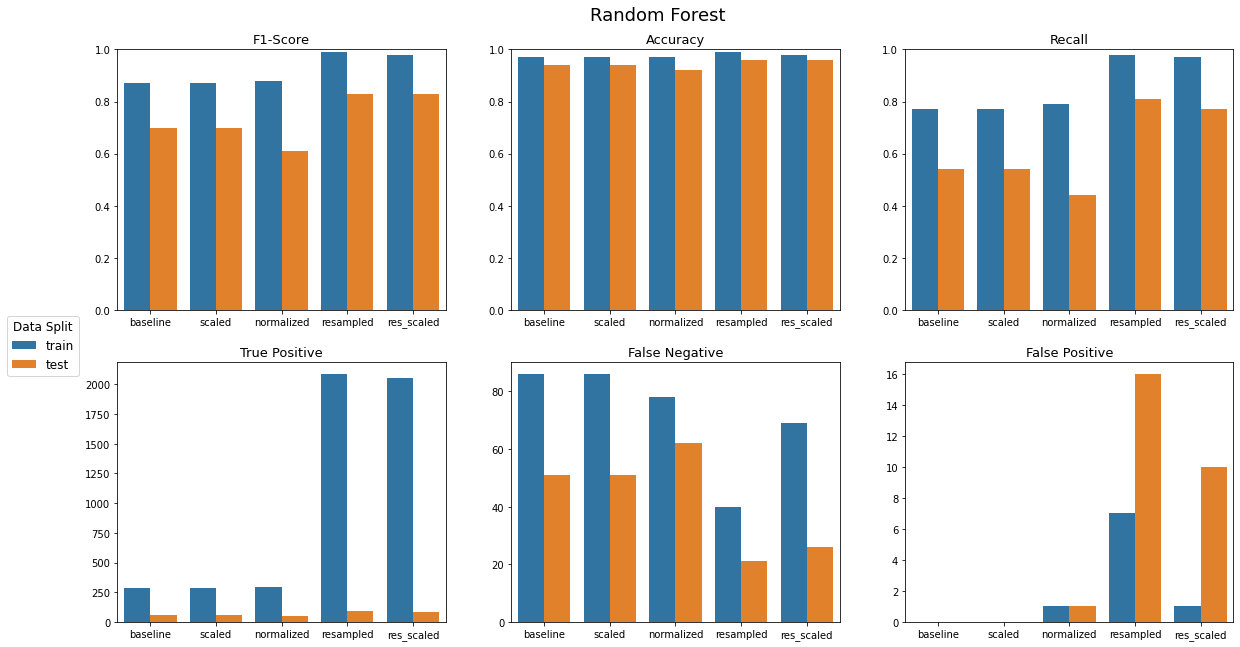

In [67]:
# Plot Metrics
plot_metrics(model_results, 'rf', 'Random Forest')

#### Conclusions:
- Same as before, based on `F1-Score`, `Accuracy` and `Recall`, it's possible to see that the model is most likely overfitting the training data.
- Resampling the features had a positive impact in all three scores.
- Even though it has a lower `Recall` score relative to other models, it has a very low No. of False Positives. That's good because it would mean that the company is not spending resources with clients that didn't have the intention to churn.

**[Go back to Table of Contents](#toc)**
## XGBoost <a class="anchor" id="model23"></a>
Finally, the last model I'm going to use is an XGBoost Classifier.

In [68]:
# Create Model Instance
xgbc_clf = XGBClassifier(random_state=123)

### Baseline

In [69]:
# Generate Report
xgbc_clf_baseline = model_report(xgbc_clf, X_train, X_test, y_train, y_test, 
                                    model_results, 'baseline', 'xgbc')

Train 
Precision: 1.0 | Recall: 0.86 | Accuracy: 0.98
F1-Score: 0.92 | Neg Predictive: 1.0
Confusion Matrix
 [[2127    0]
 [  53  319]]

Test 
Precision: 1.0 | Recall: 0.86 | Accuracy: 0.98
F1-Score: 0.92 | Neg Predictive: 1.0
Confusion Matrix
 [[723   0]
 [ 16  95]]


### Scaled Features

In [70]:
# Scaled Features
xgbc_clf_scaled = model_report(xgbc_clf, X_train_scaled, X_test_scaled, y_train, y_test,
                                  model_results, 'scaled', 'xgbc')

Train 
Precision: 1.0 | Recall: 0.86 | Accuracy: 0.98
F1-Score: 0.92 | Neg Predictive: 1.0
Confusion Matrix
 [[2127    0]
 [  53  319]]

Test 
Precision: 1.0 | Recall: 0.86 | Accuracy: 0.98
F1-Score: 0.92 | Neg Predictive: 1.0
Confusion Matrix
 [[723   0]
 [ 16  95]]


### Scaled + Normalized Features

In [71]:
# Normalized + Resampled + Scaled Features
xgbc_clf_norm = model_report(xgbc_clf, X_train_norm, X_test_norm, y_train, y_test, 
                                model_results, 'normalized', 'xgbc')

Train 
Precision: 0.99 | Recall: 0.85 | Accuracy: 0.98
F1-Score: 0.91 | Neg Predictive: 0.95
Confusion Matrix
 [[2124    3]
 [  56  316]]

Test 
Precision: 0.97 | Recall: 0.77 | Accuracy: 0.97
F1-Score: 0.86 | Neg Predictive: 0.89
Confusion Matrix
 [[720   3]
 [ 25  86]]


### Scaled + Normalized + Resampled Features

In [72]:
# Resampled + Scaled Features
xgbc_clf_resampled = model_report(xgbc_clf, X_train_resampled, X_test_norm, y_train_resampled, y_test, 
                                     model_results, 'resampled', 'xgbc')

Train 
Precision: 0.98 | Recall: 0.92 | Accuracy: 0.95
F1-Score: 0.95 | Neg Predictive: 0.78
Confusion Matrix
 [[2081   46]
 [ 162 1965]]

Test 
Precision: 0.79 | Recall: 0.83 | Accuracy: 0.95
F1-Score: 0.81 | Neg Predictive: 0.43
Confusion Matrix
 [[698  25]
 [ 19  92]]


### Scaled + Resampled Features

In [73]:
# Resampled + Scaled Features
xgbc_clf_resampled_sc = model_report(xgbc_clf, X_train_resampled_sc, X_test_scaled, y_train_resampled_sc, y_test, 
                                     model_results, 'res_scaled', 'xgbc')

Train 
Precision: 1.0 | Recall: 0.96 | Accuracy: 0.98
F1-Score: 0.98 | Neg Predictive: 1.0
Confusion Matrix
 [[2127    0]
 [  77 2050]]

Test 
Precision: 0.99 | Recall: 0.84 | Accuracy: 0.98
F1-Score: 0.91 | Neg Predictive: 0.95
Confusion Matrix
 [[722   1]
 [ 18  93]]


### Analyze Results <a class="anchor" id="model24"></a>

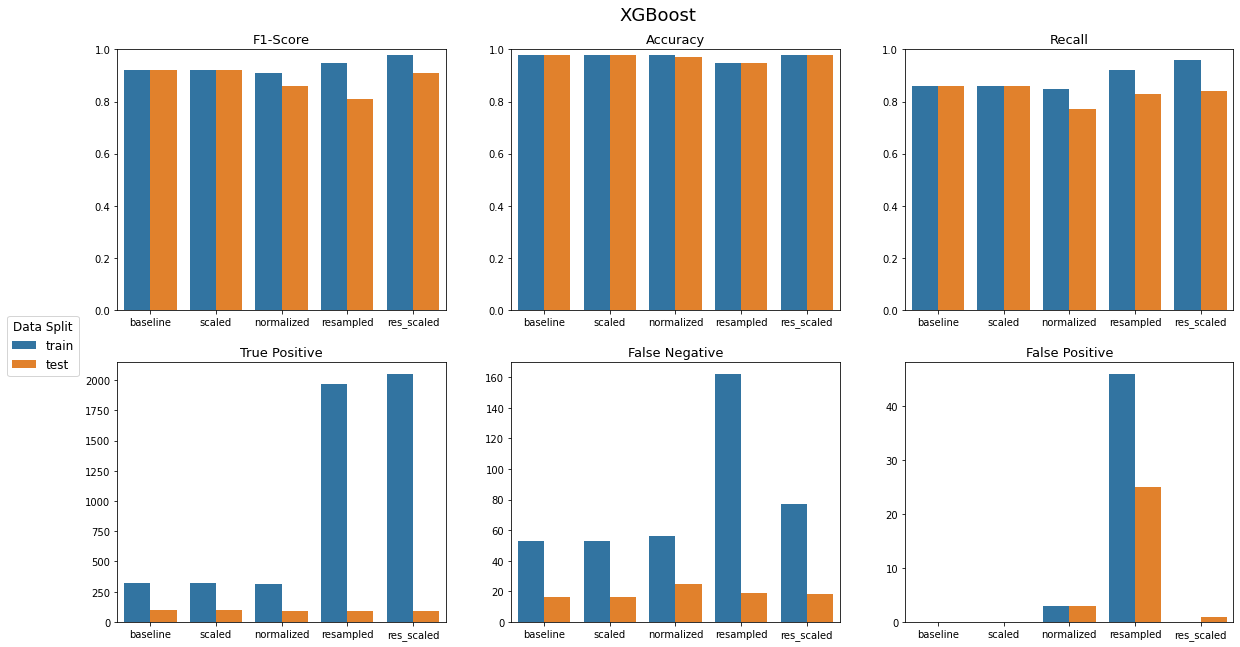

In [74]:
# Plot Metrics
plot_metrics(model_results, 'xgbc', 'XGBoost')

#### Conclusions:
- Given the Scores on the Training sets, the model is possibly overfitting.
- `Accuracy Scores` on the Training Set are just too high to be true.
- For the Scaled + Resampled Set, `Recall` is great, almost as good as the Logistic Regression's model (0.84 vs 0.87 on the Logistic Model).
- Comparing it to the Random Forest Model, it's interesting to see that the No. of False Negatives for the training set is high which usually would indicate a similar behavior for the False Positives. However, the No. of False Positives is low compared to other models. This indicates that the model is not overfitting the training set as much as the Random Forest model.
- It looks like normalizing the data had a negative impact in performance.

**[Go back to Table of Contents](#toc)**
## Comparing Models <a class="anchor" id="model25"></a>
Now it's time to compare different models. <br>After training the models in different transformations of the dataset I noticed that the `Scaled + Resampled Features` set performed better than others. Therefore, that will be the chosen feature set to compare models.

In [75]:
# Create DataFrame with model results
model_results_df = pd.DataFrame(model_results)
model_results_df.columns = ['precision', 'recall', 'accuracy', 'f1_score', 'neg_pred', 
                            'true_neg', 'false_neg', 'false_pos', 'true_pos', 'sample_set', 'model', 'split']

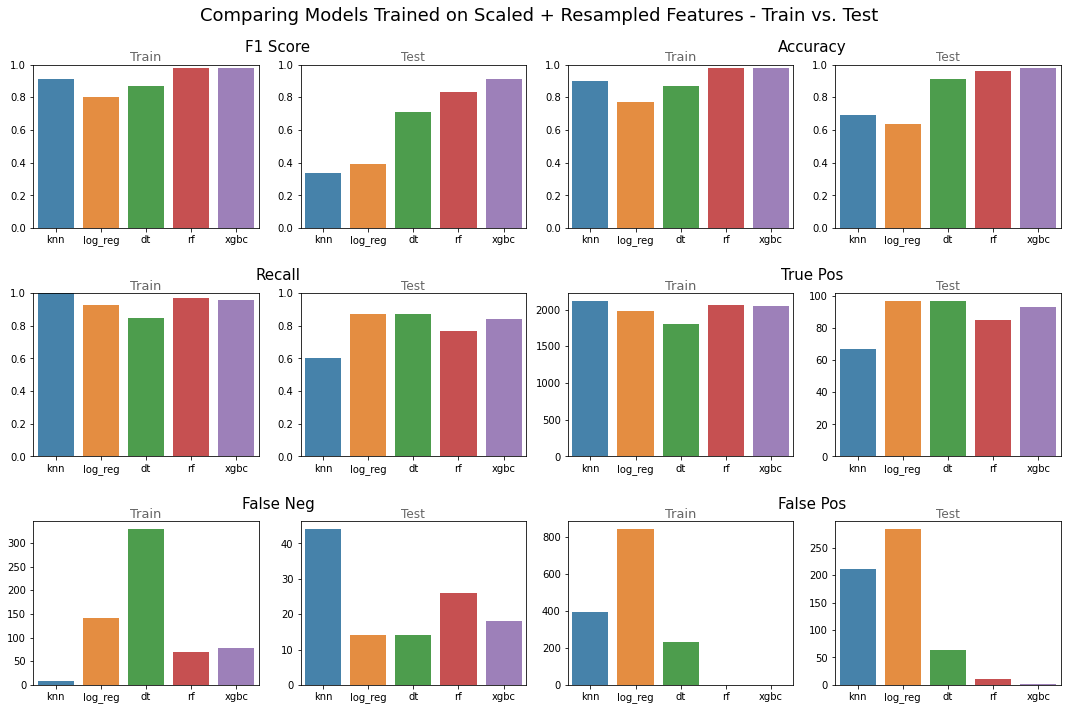

In [76]:
# Create temporary dataframe to plot results, keeping only models trained on resampled features
to_plot_test = model_results_df[(model_results_df['split'] == 'test') & 
                               (model_results_df['sample_set'] == 'res_scaled')]
to_plot_train = model_results_df[(model_results_df['split'] == 'train') & 
                                (model_results_df['sample_set'] == 'res_scaled')]

# Create Figure and Axes
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15,10))

# Add space between subplots
fig.tight_layout(h_pad=5)

# Plot Charts
for idx, metric_pair in enumerate([('f1_score', 'accuracy'), ('recall', 'true_pos'), ('false_neg', 'false_pos')]):
    
    # Calculate Row Number
    row_n = idx
    
    # Loop through metrics pair
    for idx_2, metric in enumerate(metric_pair):
        
        # Calulate Plot Location
        if idx_2 == 0:
            col_n_1 = 0
            col_n_2 = 1
        else:
            col_n_1 = 2
            col_n_2 = 3
            
        # Bar Plots
        sns.barplot(data=to_plot_train, x='model', y=metric, ci=None, ax=axes[row_n][col_n_1], alpha=0.9)
        sns.barplot(data=to_plot_test, x='model', y=metric, ci=None, ax=axes[row_n][col_n_2], alpha=0.9)
        
        # Set X/Y labels and Title
        axes[row_n][col_n_1].set_xlabel('Train', size=13, labelpad=-195, alpha=0.6)
        axes[row_n][col_n_1].set_ylabel(None)
        axes[row_n][col_n_2].set_xlabel('Test', size=12, labelpad=-195, alpha=0.6)
        axes[row_n][col_n_2].set_ylabel(None)
        axes[row_n][col_n_2].set_title(metric.replace("_", " ").title(), size=15, x=-0.1, pad=13)
        
        # For certain metrics I want to keep a fixed Y-Axis value range (0 to 1)
        if metric in ['f1_score', 'accuracy', 'recall']:
            axes[row_n][col_n_1].set(ylim=(0, 1))
            axes[row_n][col_n_2].set(ylim=(0, 1))

# Set Title
fig.suptitle('Comparing Models Trained on Scaled + Resampled Features - Train vs. Test', fontsize=18)

# Adjust Header Space
plt.subplots_adjust(top=0.90)

plt.show();

#### Conclusions:
- `F-1 and Accuracy Scores`: 
    - The Training Set's Scores are very high for the Random Forest and XGBoost models which could indicate that the models are overfitting the data. However, by looking at the Test Set's Scores, it's possible to see that both have also high values and are performing better than other models. In an overfitted model I'd expect to see them not performing well on the Test Set.
- `Recall Score`: 
    - It's clear that the K-Nearest Neighbors model is overfitting the Training Set.
    - The Logistic Regression, Decision Tree and XGBoost models have similar performance on the Test Set. With the XGBoost model coming in third place.
- `True Positives`: 
    - The Logistic Regression, Decision Tree and XGBoost models have similar performance on the Test Set. With the XGBoost model coming in third place, again.
- `False Negatives`:
    - The Decision Tree model is underperforming and missing more churned clients than others on the Training Set. However, surprisingly the model is performing on par with the Logistic Regression and XGBoost models on the Test Set.
    - Here's another data point showing that the K-Nearest Neighbors is overfitting the Training Set with almost no False Negatives on the Training Set and more than others on the Test Set.
    - The Logistic Regression and Decision Tree models are performing better than others with XGBoost coming in third place.
- `False Positives`:
    - Here we can see that the XGBoost Model is performing better than the Decision Tree and Logistic Regression ones. The three models have similar Recall Scores, but the Logistic Regression model is creating a lot more False Positives and the Decision Tree model is generating more than the XGBoost model. This is important because of all the effort that the Telecom Company will probably put to avoid these "about to churn" clients from churning. It's going to be way more expensive for the company to reduce Churn Rate if they decide to use the Logistic Regression model.
    
## Choosing a model <a class="anchor" id="model26"></a>
I'm between the Decision Tree and XGBoost models. 
- `Recall Score`: Even though it's not performing as well as XGBoost on the Training Set, the **Decision Tree is the winner on the Testing Set.**
- `False Negative/True Positive`: Even though it's not performing as well as XGBoost on the Training Set, the **Decision Tree is the winner on the Testing Set.**
- `False Positive`: Even though the XGBoost is performing better than the Decision Tree, I'm afraid that the model is not conservative. Not having any False Positives is a bit concerning. I rather have some and be conservative than missing a client who is about to churn. 

Therefore, the **Decision Tree model is the winner.**

**[Go back to Table of Contents](#toc)**

## Model Tuning <a class="anchor" id="model27"></a>
Even though I have already tried different hypermaters on the Decision Tree Model, I'm going to test more of them and see if I can increase the performance a bit.

#### Current Performance

In [77]:
model_results_df[(model_results_df['model'] == 'dt') & 
                 (model_results_df['sample_set'] == 'res_scaled')]

,precision,recall,accuracy,f1_score,neg_pred,true_neg,false_neg,false_pos,true_pos,sample_set,model,split
28,0.89,0.85,0.87,0.87,0.59,1897,329,230,1798,res_scaled,dt,train
29,0.60,0.87,0.91,0.71,0.18,659,14,64,97,res_scaled,dt,test


#### Use `GridSearchCV` and try different hyperparameters
I'm choosing the `Recall Score` as what I'm trying to optimize.

In [78]:
# Different Hyperparameters
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': list(range(1, 10)),
              'max_features': [40, 60, None],
              'max_leaf_nodes': list(range(1, 10)),
              'min_samples_leaf': [50, 100, 200, 300, 400, 500],
              'min_samples_split': [50, 100, 200, 300, 400, 500]}

# Try Different Hyperparameters
dt_clf_new = GridSearchCV(DecisionTreeClassifier(random_state=123), param_grid, n_jobs=-1, scoring='recall')

In [ ]:
# Train new model
dt_clf_new_gs = model_report(dt_clf_new, X_train_resampled_sc, X_test_scaled, y_train_resampled_sc, y_test, 
                             model_results, 'res_scaled_optimized', 'dt')

#### Analyze Results

In [ ]:
# Create DataFrame with model results
model_results_df = pd.DataFrame(model_results)
model_results_df.columns = ['precision', 'recall', 'accuracy', 'f1_score', 'neg_pred', 
                            'true_neg', 'false_neg', 'false_pos', 'true_pos', 'sample_set', 'model', 'split']

# Analyze Improvement
model_results_df[(model_results_df['model'] == 'dt') & 
                 (model_results_df['split'] == 'test') & 
                 (model_results_df['sample_set'].isin(['res_scaled', 'res_scaled_optimized']))]

#### Conclusions:
- `Recall`: From 0.87 to 0.89.
- `True Positive | False Positive`: The no. of True Positives increased by 2 while the No. of False Positives increased by 19. Therefore, it's questionable whether the new _optimized_ model is better. Because the increase of 2% on `Recall` comes at the cost of increasing the No. of False Positive by 19.

#### _Optimized_ Hyperparameters

In [ ]:
# Best Hyperparameters
dt_clf_new.best_params_

**[Go back to Table of Contents](#toc)**
## Model Interpretation <a class="anchor" id="model28"></a>
Next, I'm going to interpret the model so my stakeholders can have a better idea of how I'm predicting churning clients. Moreover, this will help them to focus on the metrics that matter and monitor them.

### Understand the importance of features to the model <a class="anchor" id="model29"></a>

In [ ]:
# Create List with Feature Name and Weight
features_lst = []
for i in zip(list(X.columns), dt_clf_new.best_estimator_.feature_importances_):
    features_lst.append(i)

# Create Dataframe and sort values to plot
dt_features = pd.DataFrame(features_lst, columns=['feature', 'weight'])
dt_features = dt_features.sort_values('weight').reset_index(drop=True)

In [ ]:
dt_features.sort_values('weight', ascending=False).head(10)

#### Conclusions
- `international_plan`, `total_charge` and `customer_service_calls` are the top features of the model. This helps to understand how the model is deciding on whether a customer is about to churn or not

### Understanding the Decision Tree Model <a class="anchor" id="model30"></a>
A good way to understand a Decision Tree model is to look at the Nodes and Leafs. With that I can understand how the model is classifying records and which are the decision threshold values.

In [ ]:
# Plot Decision Tree
plt.figure(figsize=(20,5))
plot_tree(dt_clf_new.best_estimator_,
          feature_names = list(X.columns), 
          class_names=['0', '1'],
          filled = True);

In [ ]:
# Use different visualization to understand how the Decision Tree is working
dtreeviz(dt_clf_new.best_estimator_, X_train_resampled_sc, y_train_resampled_sc,
        target_name="churn",
        feature_names=list(X.columns),
        class_names=['false', 'true'],
        scale=1.5)

It's hard to interpert the trees above because the features are scaled and not in their original scale. Therefore, I'll convert those threshold values to the original scale so it's easier to understand.

To achieve that, I'm taking the following steps:
1. Calculate Percentiles of Threshold Values of the features.
2. Inverse the Scaling of Features so we have them on their standard scale.
3. Calculate the Threshold Values using the Percentiles.

In [ ]:
# Convert to dataframe
X_train_res_sc_df = pd.DataFrame(X_train_resampled_sc, columns=X.columns)

# Calculate Percentiles of Threshold values
total_charge_perc = stats.percentileofscore(X_train_res_sc_df['total_charge'], 1.383) / 100
int_plan_perc = stats.percentileofscore(X_train_res_sc_df['international_plan'], -0.312) / 100
cus_serv_cal_perc = stats.percentileofscore(X_train_res_sc_df['customer_service_calls'], 1.082) / 100

# Inversed scaled features
X_train_res_sc_reversed = scaler.inverse_transform(X_train_resampled_sc)
X_train_res_sc_reversed_df = pd.DataFrame(X_train_res_sc_reversed, columns=X.columns) 

# Calculate quantile values
total_charge_val = X_train_res_sc_reversed_df['total_charge'].quantile(total_charge_perc)
int_plan_val = X_train_res_sc_reversed_df['international_plan'].quantile(int_plan_perc)
cus_serv_cal_val = X_train_res_sc_reversed_df['customer_service_calls'].quantile(cus_serv_cal_perc)

#### Threshold Values in their original scale

In [ ]:
print(f'Total Charge: {round(total_charge_val, 2)}')
print(f'International Plan: {round(int_plan_val, 2)}')
print(f'Customer Service Calls: {round(cus_serv_cal_val, 2)}')

Now that I have the threshold values on their original scales, I can interpret the decision tree.

#### Interpretation - Walk-through the Classification of a Record
- If `total_charge`:
    - **> 74.03 USD**: the chance of churning is 94% (762/811).
    - **<= 74.03 USD**: the chance of churning is 39% (1365/3443).

- If `total_charge <= 74.03` + `international_plan`:
    - **Is True**: the chance of churning is 82% (636/774).
    - **Is False**: the chance of churning is 27% (729/2669).

- If `total_charge <= 74.03` + `international_plan == False` + No. of `customer_service_calls`:
    - **<= 3**: the chance of churning is 15% (323/2171).
    - **> 3**: the chance of churning is 81% (406/498).

#### Conclusions
- **What's wrong with High Spenders?** 
    - A 94% of churning if the Total Charge is greater than 74.03 USD is a problem. Further research on the group is necessary for further recommendations.
- **What's wrong with the International Plan?** 
    - Non-High Spenders have high chances (82%) of churning if they have the International Plan. Maybe there's something wrong with the product. It would be worthwhile to understand what's wrong with it. Read complaints/feedback from users.
- **Reduce the No. of Customer Service Calls:** 
    - It's expected that more Customer Service Calls would lead to higher chances of churning. If a client is calling often is because there's something wrong and the company is not fixing it. I guess a good idea would be to understand the reasons of those calls and see if there's anything the Telecom can do in the product to fix those problems and reduce the No. of Calls. 
    - Another suggestion could be to reduce the No. of Calls by providing online solutions to users or create educational materials to teach users how to use the product or a FAQ page. However, it's important to say that No. of Calls should not imply causation, rather, we should understand the reason behind the calls and work on those things.
    - Another possibility is that the Customer Service team is not doing a great job. Maybe they're taking to long to answer calls or solve problems.
    
# Important Caveat <a class="anchor" id="caveat"></a>
**Focus on Leading Indicators** 
>Rather than analyzing a list of clients and identifying the ones who churned, it would be more meaningful to see these users' behaviors prior to churning. The dataset is showing the latest information on them, as far as I understand it. <br>Therefore, it might be too late for the company to avoid those churnings before they happen if they rely only on my model. To mitigate that problem, for example, I'd recommend lowering the Total Charge threshold from 74.03 USD to 70 USD. With that approach, once a client starts to get close to that amount a flag is raised.
    
**[Go back to Table of Contents](#toc)**